In [25]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr, chi2
from sklearn.covariance import MinCovDet

# Problem Statement
Coorporate wants to create an automation to predict which customer who is eligible to have a loan for the property. Given the dataset with several features, please do analysis for questions or hypothesis below.

In [26]:
train_data = pd.read_csv("loan_sanction_train.csv")
test_data = pd.read_csv("loan_sanction_test.csv")

In [27]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [28]:
# Look the data briefly
display(train_data.head())
print("Data Info :")
print(train_data.info())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


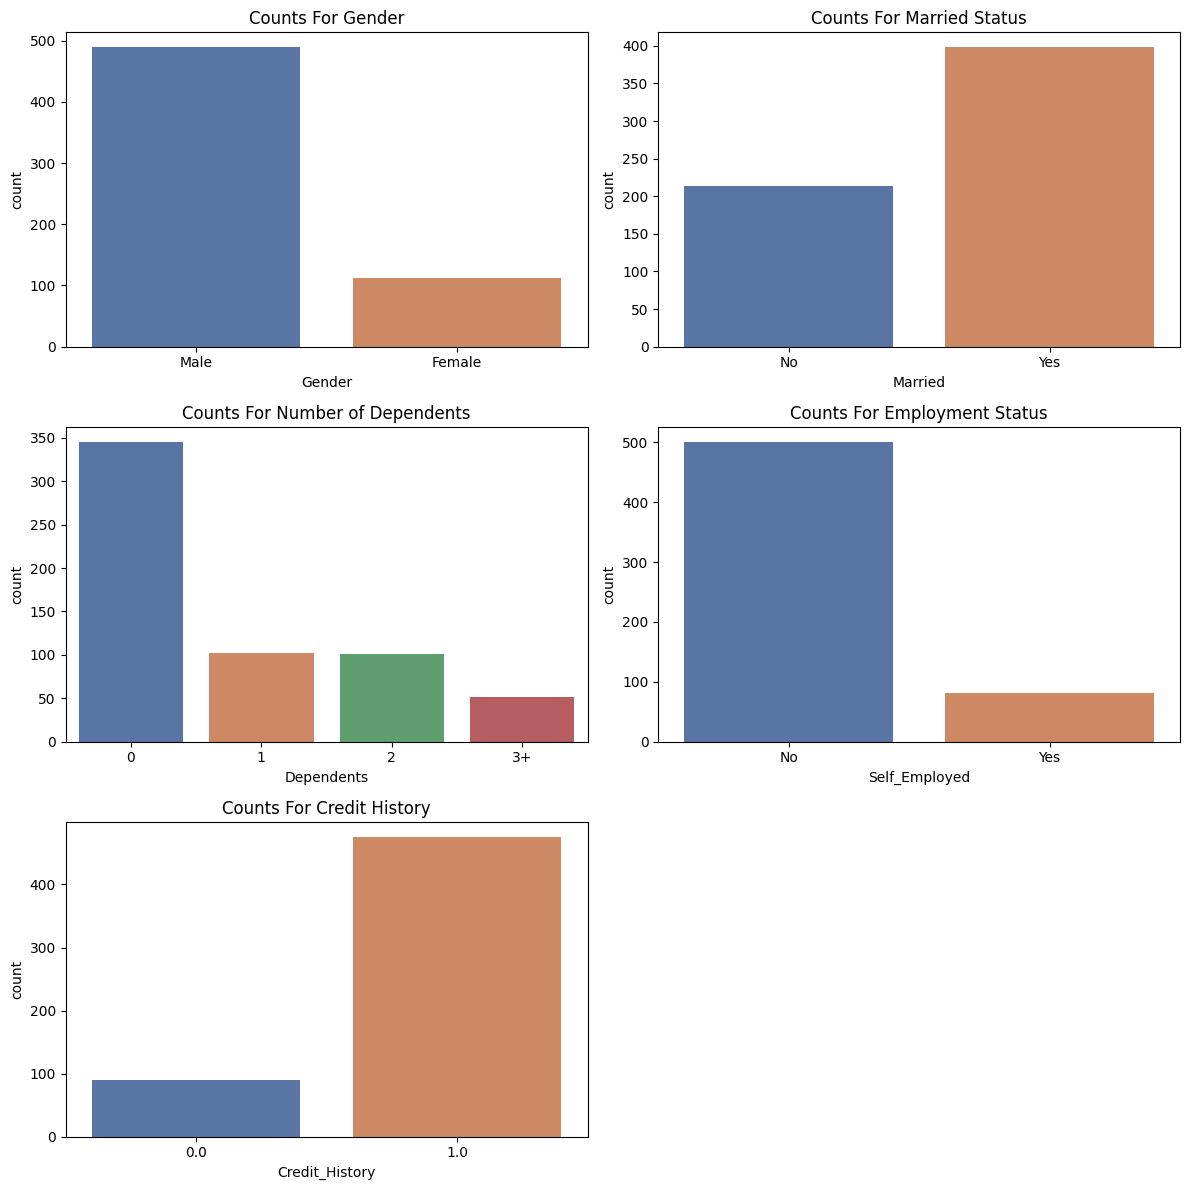

In [29]:
# lets plot the counts of 4 feautures (Gender, Married, Number of Dependents, and Employment Status)
# We'll be choosing the mode of every features to be selected as value for missing values

sns.set_palette('deep')
fig, ax = plt.subplots(3,2,figsize = (12,12))
sns.countplot(x = 'Gender', data = train_data, ax = ax[0,0])
sns.countplot(x = 'Married', data = train_data, ax = ax[0,1])
sns.countplot(x = 'Dependents', data = train_data, ax = ax[1,0])
sns.countplot(x = 'Self_Employed', data = train_data, ax = ax[1,1])
sns.countplot(x = 'Credit_History', data = train_data, ax = ax[2,0])
ax[2,1].axis('off')

ax[0,0].set_title('Counts For Gender')
ax[0,1].set_title('Counts For Married Status')
ax[1,0].set_title('Counts For Number of Dependents')
ax[1,1].set_title('Counts For Employment Status')
ax[2,0].set_title('Counts For Credit History')

plt.tight_layout()
plt.show()

In [30]:
# We're assuming mode of every categorical features and median of every numeric features to be the value for missing values.
train_copy = train_data.copy()
train_copy['Gender'] = train_copy['Gender'].fillna('Male')
train_copy['Married'] = train_copy['Married'].fillna('Yes')
train_copy['Dependents'] = train_copy['Dependents'].fillna('0')
train_copy['Self_Employed'] = train_copy['Self_Employed'].fillna('No')
train_copy['Credit_History'] = train_copy['Credit_History'].fillna(1.0).astype(int)
train_copy['LoanAmount'] = train_copy['LoanAmount'].fillna(np.median(train_copy['LoanAmount'].dropna()))
train_copy['Loan_Amount_Term'] = train_copy['Loan_Amount_Term'].fillna(np.median(train_copy['Loan_Amount_Term'].dropna()))


In [31]:
print(train_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 60.1+ KB
None


In [32]:
# Checking Duplicated Values.
print("Number of duplicated data :")
print(train_copy.duplicated().sum())

Number of duplicated data :
0


# Exploratory Data Analysis

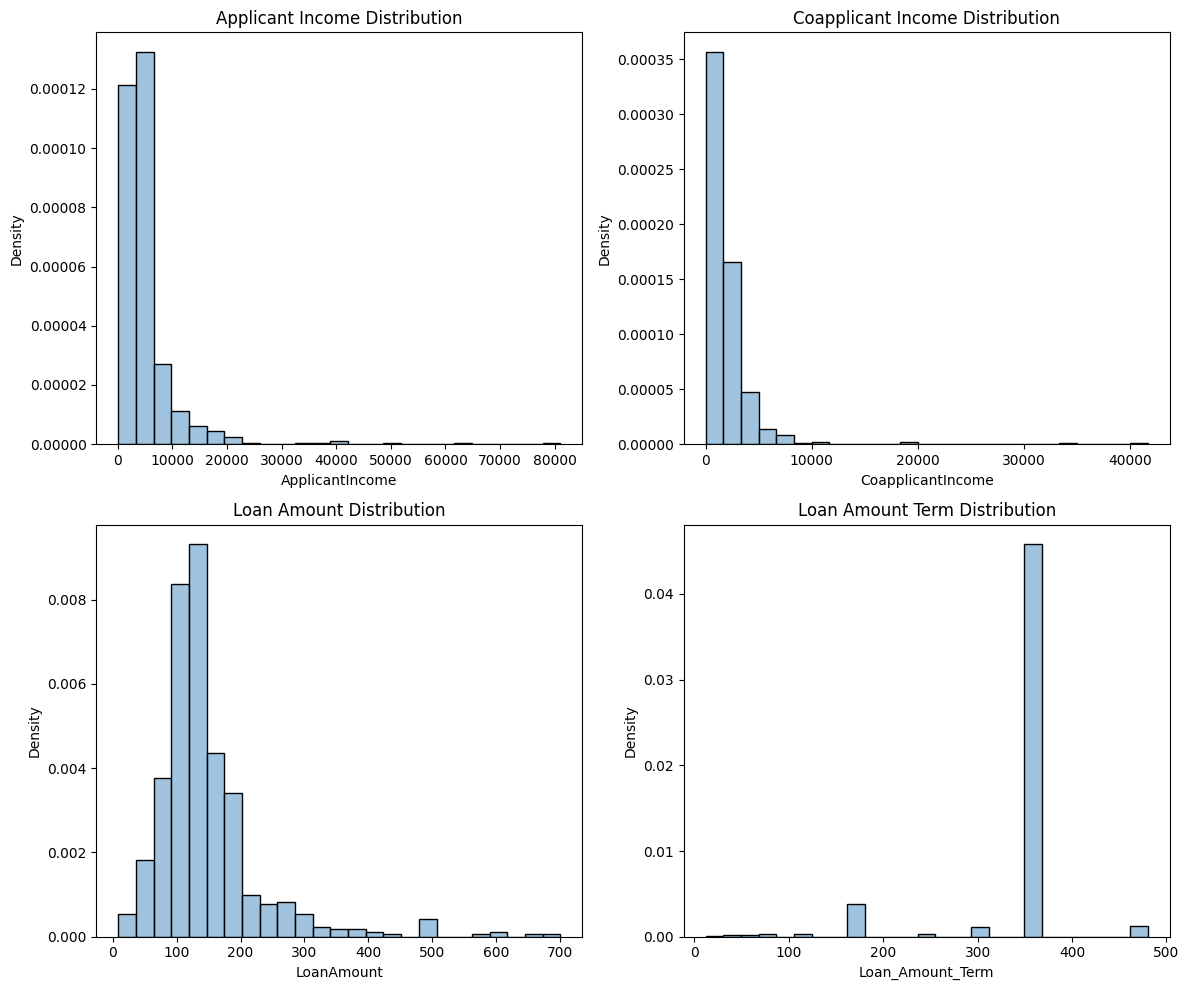

In [33]:
# try to plot continuous features on the data.
# Objective : to see distribution of continous features and detect outliers.

fig, ax = plt.subplots(2,2, figsize = (12,10))

sns.histplot(x = 'ApplicantIncome', data = train_copy, stat = 'density', color = '#80b0d5', ax = ax[0,0], bins = 25)
sns.histplot(x = 'CoapplicantIncome', data = train_copy, stat = 'density', color = '#80b0d5', ax = ax[0,1], bins = 25)
sns.histplot(x = 'LoanAmount', data = train_copy, stat = 'density', color = '#80b0d5', ax = ax[1,0], bins = 25)
sns.histplot(x = 'Loan_Amount_Term', data = train_copy, stat = 'density', color = '#80b0d5', ax = ax[1,1], bins = 25)

ax[0,0].set_title('Applicant Income Distribution')
ax[0,1].set_title('Coapplicant Income Distribution')
ax[1,0].set_title('Loan Amount Distribution')
ax[1,1].set_title('Loan Amount Term Distribution')

plt.tight_layout()
plt.show()

**Note:**
Based on above visualizations, we can see there are some outliers in our data. To address this problem, we will exclude the outliers for now and try to analyze furthermore after several steps. We will use multivariate method to detect the outliers with Mahalanobis Distance.

In [34]:
def remove_outlier_multivariate(data):
    """Fungsi ini akan mengeluarkan data yang telah dikeluarkan outliernya dan data outliernya"""
    selected_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
    x_values =  data.loc[:,selected_features].values
    mcd = MinCovDet()
    mcd.fit(x_values)
    loc_ = mcd.location_
    cov_ = mcd.covariance_
    mahal_robust_dist = mcd.mahalanobis(x_values)
    cutoff = chi2.ppf(0.95, x_values.shape[1])
    data_new = data.loc[mahal_robust_dist <= cutoff]
    data_outliers = data.loc[mahal_robust_dist > cutoff]
    return data_new, data_outliers

In [35]:
data_without, outliers = remove_outlier_multivariate(train_copy)

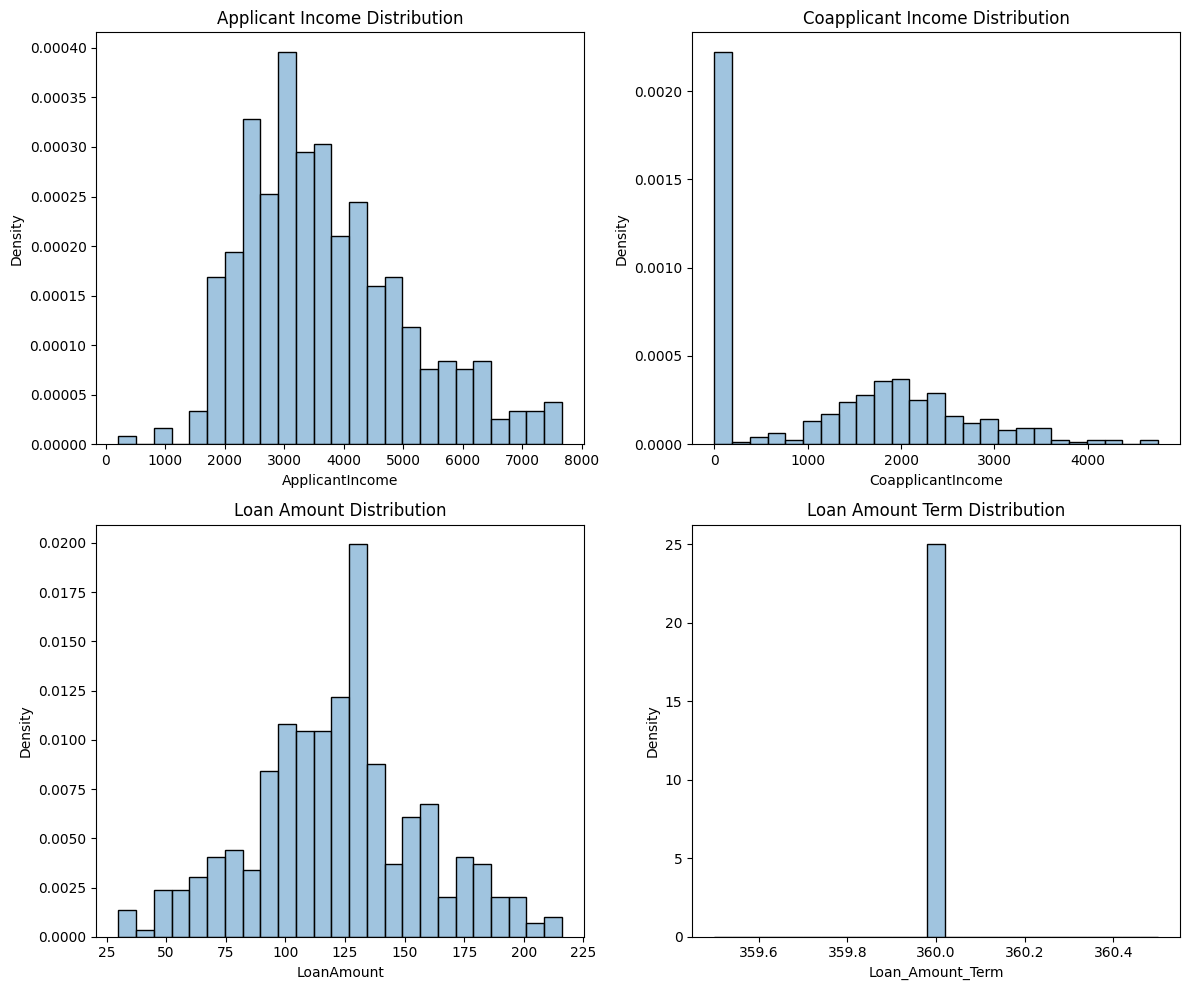

In [36]:
# try to plot continuous features on the data.
# Objective : to see distribution of continous features and detect outliers.

fig, ax = plt.subplots(2,2, figsize = (12,10))

sns.histplot(x = 'ApplicantIncome', data = data_without, stat = 'density', color = '#80b0d5', ax = ax[0,0], bins = 25)
sns.histplot(x = 'CoapplicantIncome', data = data_without, stat = 'density', color = '#80b0d5', ax = ax[0,1], bins = 25)
sns.histplot(x = 'LoanAmount', data = data_without, stat = 'density', color = '#80b0d5', ax = ax[1,0], bins = 25)
sns.histplot(x = 'Loan_Amount_Term', data = data_without, stat = 'density', color = '#80b0d5', ax = ax[1,1], bins = 25)

ax[0,0].set_title('Applicant Income Distribution')
ax[0,1].set_title('Coapplicant Income Distribution')
ax[1,0].set_title('Loan Amount Distribution')
ax[1,1].set_title('Loan Amount Term Distribution')

plt.tight_layout()
plt.show()

**Note:**
Based on above visualizations, we can see the distributions look more normal than the previous. However, we still have to analyze the outliers that we have removed previously. For now, we will find out how many outliers that have removed and proceed to do exploratory analysis.

In [37]:
print('Number of outliers :')
print(outliers.shape[0])
print('Number of data without outliers :')
print(data_without.shape[0])

Number of outliers :
216
Number of data without outliers :
398


In [38]:
# Lets Visualize the numeric features with descriptive stats,correlation tabel,scatterplot to find any patterns.
print("Descriptive Stats for the numeric features :")
display(data_without.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe().T)

Descriptive Stats for the numeric features :


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,398.0,3711.891960,1357.603363,210.0,2683.75,3464.5,4578.75,7667.0
CoapplicantIncome,398.0,1215.226432,1203.008674,0.0,0.00,1293.5,2130.00,4750.0
LoanAmount,398.0,121.474874,35.302480,30.0,100.00,121.0,139.75,216.0
Loan_Amount_Term,398.0,360.000000,0.000000,360.0,360.00,360.0,360.00,360.0


Correlation Table :


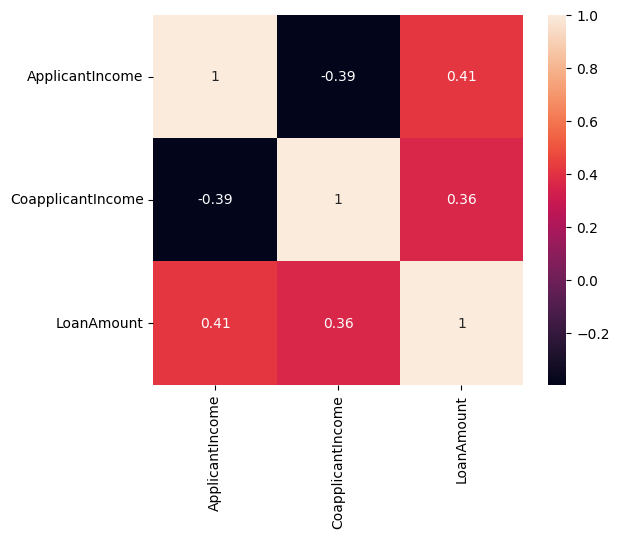

In [39]:
correlation = data_without.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr()
print("Correlation Table :")
sns.heatmap(correlation, square = True, annot = True)
plt.show()

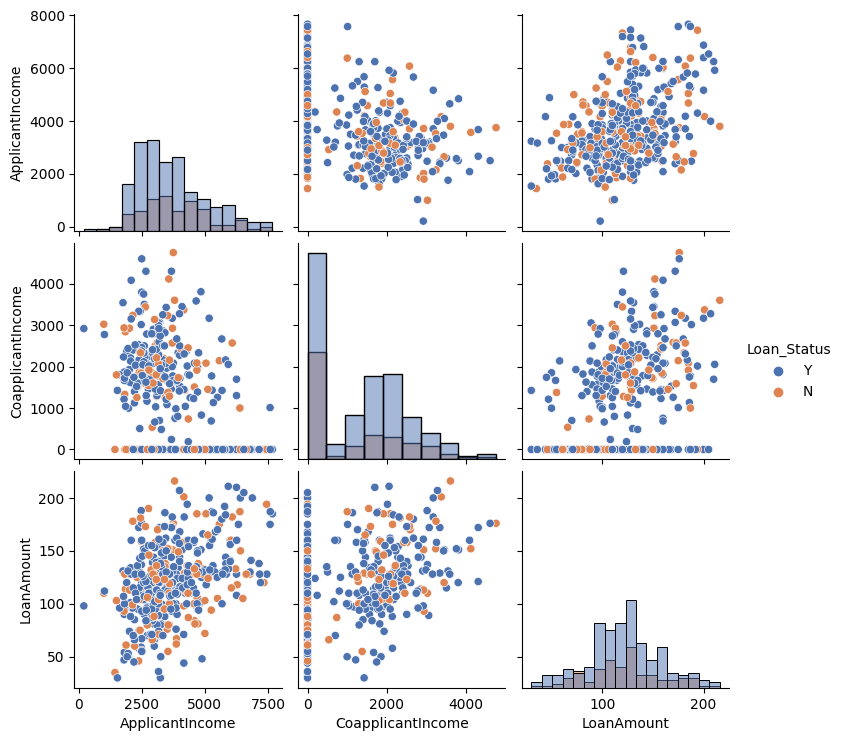

In [40]:
sns.pairplot(data_without.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']],hue = 'Loan_Status', diag_kind = 'hist')
plt.show()

**Note:**
From correlation heatmap and pairplot visualization above, we can see that there is no strong relationship between each numeric features. Furthermore, we aren't able to distinguish between customer who has 'Yes' loan status and 'No' loan status based on these 3 numeric features (Applicant Income, Coapplicant Income, and Loan Amount) solely on by looking at the visualization. To address this, we'll do statistical test for these numeric features to find out whether 'Yes' loan status is different to 'No' loan status.

In [41]:
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import shapiro,bartlett,levene

In [42]:
# We conduct MANOVA statistical test to find out if Loan Status 'Yes' and 'No' are different on the average based on 3 numeric features (Applicant Income, Coapplicant Income, and Loan Amount) simultaneously
manova_result = MANOVA.from_formula('ApplicantIncome + CoapplicantIncome + LoanAmount ~ Loan_Status', data = data_without).mv_test()
print("H0 : Loan 'Yes' and 'No' are not different")
print("HI : Loan 'Yes' and 'No' are different")
print("="*25)
print("Manova result :")
print(manova_result)

H0 : Loan 'Yes' and 'No' are not different
HI : Loan 'Yes' and 'No' are different
Manova result :
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1912 3.0000 394.0000 555.5934 0.0000
         Pillai's trace 0.8088 3.0000 394.0000 555.5934 0.0000
 Hotelling-Lawley trace 4.2304 3.0000 394.0000 555.5934 0.0000
    Roy's greatest root 4.2304 3.0000 394.0000 555.5934 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       Loan_Status       Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9927 3.0000 

**note :** From the manova test above, we can see the result fail to reject the null hypothesis with alpha or error type 1 0.05 that there is no significant difference on average based on 3 numeric features between loan status 'Yes' and 'No'. In conclusion, a person who has loan status 'Yes' is not different to a person who has loan status 'No' when it comes to these 3 numeric features (applicant income, coapplicant income, and loan amount). Next, we want to asses if the statistical method that we used satisfies assumptions to verify the test is reliable.

In [43]:
# Normality Assumption.
loan_yes = data_without[data_without['Loan_Status'] == 'Y']
loan_no = data_without[data_without['Loan_Status'] == 'N']

# Normality Assumption for 'Yes' group.
app_yes = shapiro(loan_yes['ApplicantIncome'].values).pvalue
coapp_yes = shapiro(loan_yes['CoapplicantIncome'].values).pvalue
amount_yes = shapiro(loan_yes['LoanAmount'].values).pvalue

# Normality Assumption for 'No' group.
app_no = shapiro(loan_no['ApplicantIncome'].values).pvalue
coapp_no = shapiro(loan_no['CoapplicantIncome'].values).pvalue
amount_no = shapiro(loan_no['LoanAmount'].values).pvalue

print("Normality assumption test for 'Yes' group :")
print(f"P-val for applicant income = {app_yes}")
print(f"P-val for coapplicant income = {coapp_yes}")
print(f"P-val for loan amount = {amount_yes}")
print("="*25)
print("Normality assumption test for 'No' group :")
print(f"P-val for applicant income = {app_no}")
print(f"P-val for coapplicant income = {coapp_no}")
print(f"P-val for loan amount = {amount_no}")
print("="*25)
print(f"Number of sample for Loan status 'Yes' = {loan_yes.shape[0]}")
print(f"Number of sample for Loan status 'No' = {loan_no.shape[0]}")

Normality assumption test for 'Yes' group :
P-val for applicant income = 2.792272546514596e-08
P-val for coapplicant income = 1.882456863999682e-14
P-val for loan amount = 0.049628909677267075
Normality assumption test for 'No' group :
P-val for applicant income = 0.05123492330312729
P-val for coapplicant income = 6.508583949571545e-11
P-val for loan amount = 0.41012075543403625
Number of sample for Loan status 'Yes' = 285
Number of sample for Loan status 'No' = 113


In [44]:
# Equal Variance Assumption.
app_var = levene(loan_yes['ApplicantIncome'].values,loan_no['ApplicantIncome'].values)
coapp_var = levene(loan_yes['CoapplicantIncome'].values,loan_no['CoapplicantIncome'].values)
amount_var = levene(loan_yes['LoanAmount'].values,loan_no['LoanAmount'].values)
print("Equal variance test for  applicant income :")
print(f"Statistic = {app_var.statistic} and P-val = {app_var.pvalue}")
print("="*25)
print("Equal variance test for  coapplicant income :")
print(f"Statistic = {coapp_var.statistic} and P-val = {coapp_var.pvalue}")
print("="*25)
print("Equal variance test for loan amount :")
print(f"Statistic = {amount_var.statistic} and P-val = {amount_var.pvalue}")

Equal variance test for  applicant income :
Statistic = 0.025140933494971505 and P-val = 0.8740972180624114
Equal variance test for  coapplicant income :
Statistic = 0.10704808034013433 and P-val = 0.7437030926009528
Equal variance test for loan amount :
Statistic = 0.16801138832446028 and P-val = 0.6821068770223779


**Note :** There are 4 common assumptions of MANOVA : 1.Multivariate Normality, 2.Independence Samples, 3.Equal Covariance Matrix, 4. low outliers presence. First, based on the result of the normality test on each group, we find that not all group satisfy normality. that being said, if the sample for each groups is large enough, MANOVA tends to robust to this assumption. Fortunately, our samples on each groups is large enough, so we can say the first assumption is satisfied. Second, because we don't know how the data or samples are collected, we're assuming that the samples are independent and the second assumption is satisfied. Third, based on the equal variance test previously, we get the result that fail to reject the null hypothesis with an alpha = 0.05. So, the variance between each groups are equal and third assumption is satisfied. Last, the fourth assumption is already satisfied because we have removed outliers form the previous step. In conclusion, all the assumptions are satisfied and we can rely the result of MANOVA test that there is no significnat difference between loan status 'Yes' and 'No' when it comes to these 3 numeric feature (Applicant Income, Coapplicant Income, and Loan Amount).

For the next analysis, we want to see is there any factors from the categorical features that may be affecting a person has 'Yes' or 'No' loan status. We will be using chisquare or fisher exact statistical test to test the hypothesis.

In [45]:
print(data_without.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [46]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

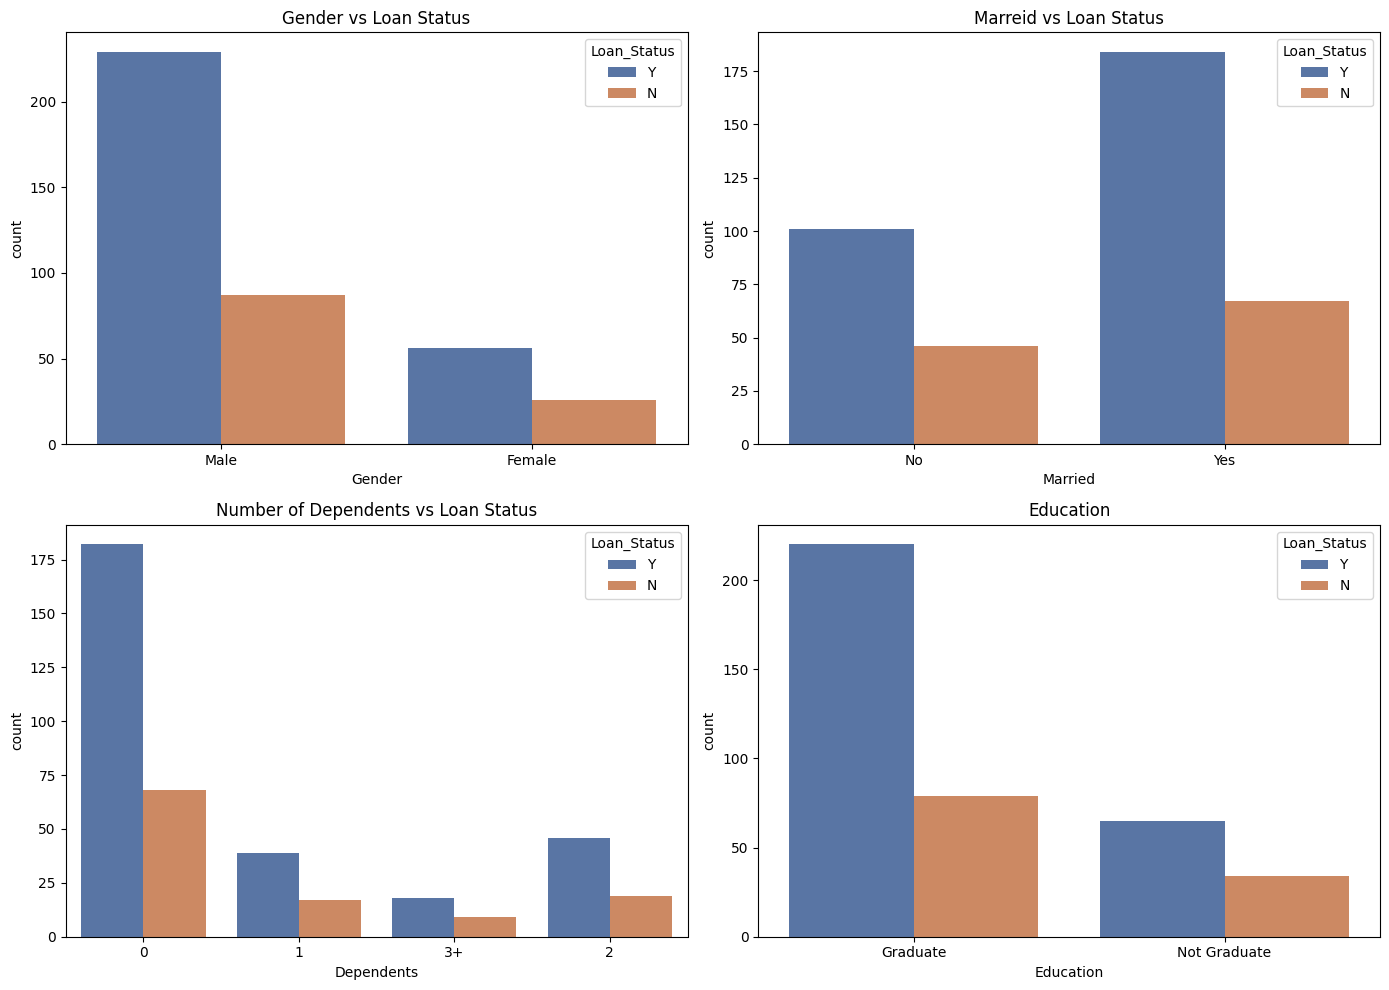

In [47]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

sns.countplot(x = 'Gender', hue = 'Loan_Status', data = data_without, ax = ax[0,0])
sns.countplot(x = 'Married', hue = 'Loan_Status', data = data_without, ax = ax[0,1])
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = data_without, ax = ax[1,0])
sns.countplot(x = 'Education', hue = 'Loan_Status', data = data_without, ax = ax[1,1])

ax[0,0].set_title('Gender vs Loan Status')
ax[0,1].set_title('Marreid vs Loan Status')
ax[1,0].set_title('Number of Dependents vs Loan Status')
ax[1,1].set_title('Education')

plt.tight_layout()
plt.show()

**Note :** Based on visualizations above, we will try to intepret one by one.
1. Gender vs Loan Status : From the visualization, we can see that male has a tendency to be accepted for loan than female. However, male also has a tendency not to be accepted for loan than female. This information raises a question : is loan status dependent to gender? or not?. To answer this question we will use statistical test called Chi-Square test to see if 2 variabels are dependent or not. 
2. Married vs Loan Status : From the visualization, we can see that a married person has a tedency to be accepted for loan than a single person. However, a married person also has a tendency not to be accepted for loan than a single person. This information raises a question : is loan status dependent to married? or not?.
3. Dependents vs Loan Status : From the visualization, we can see that a person ho has 0 dependents has a tendency to be accepted for loan than the rest. However, a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents. This information raises 2 questions : First, is loan status dependent to number of depedents? or not ?. Second, What caused that a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan.
4. Education vs Loan Status : From the visualization, we can see that a person who is graduated has a tedency to be accepted for loan than a person who is not graduated person. However, a person who is graduated also has a tendency not to be accepted for loan than a person who is not graduated. This information raises a question : is loan status dependent to education? or not?.

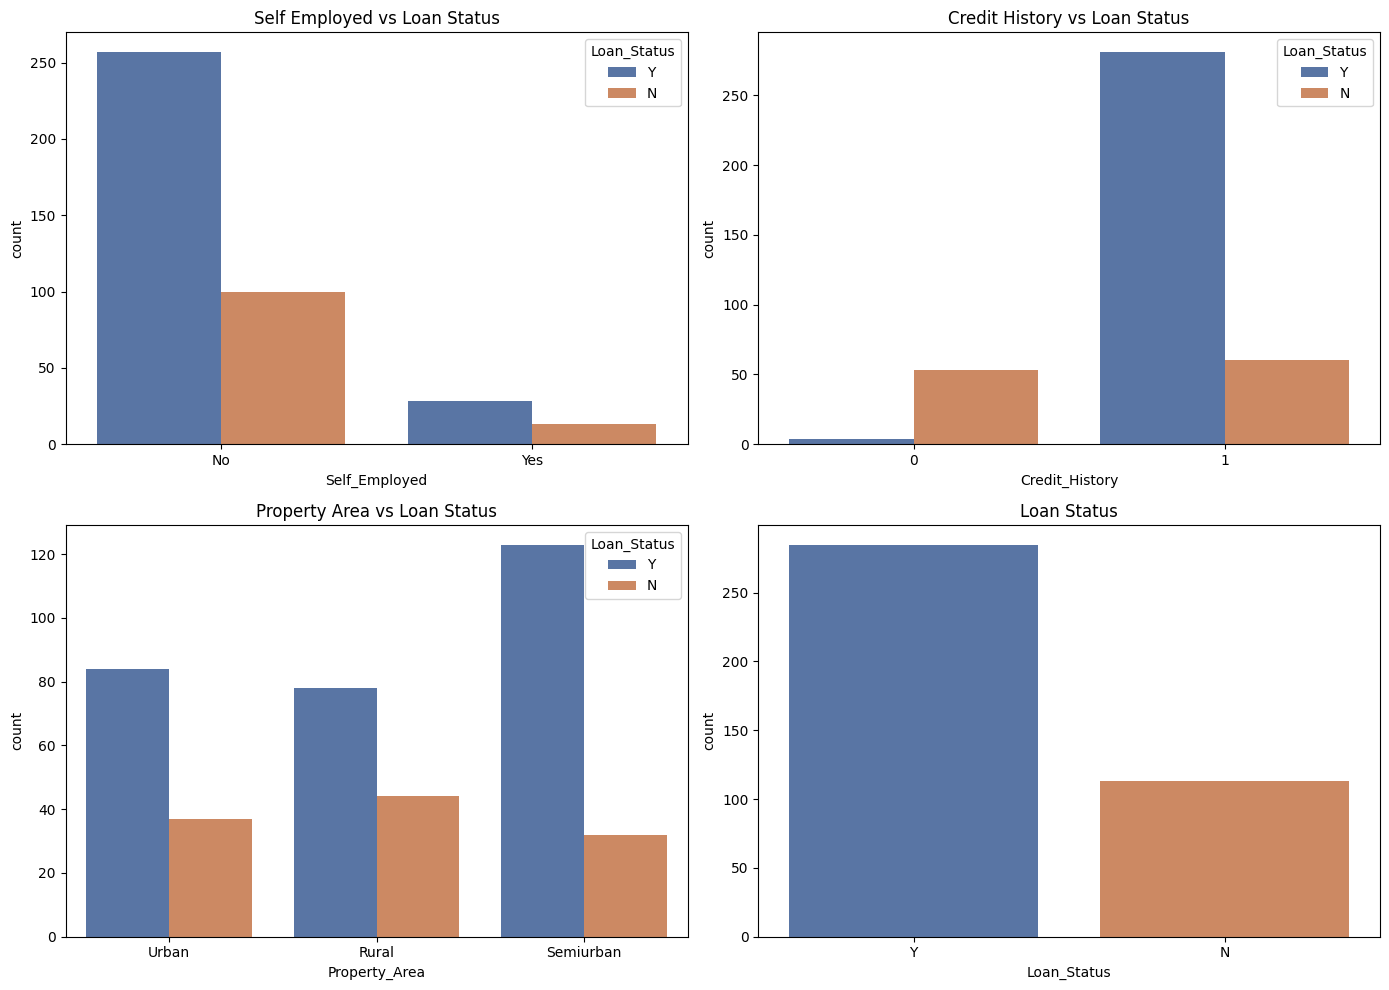

In [48]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data_without, ax = ax[0,0])
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = data_without, ax = ax[0,1])
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = data_without, ax = ax[1,0])
sns.countplot(x = 'Loan_Status', data = data_without, ax = ax[1,1])

ax[0,0].set_title('Self Employed vs Loan Status')
ax[0,1].set_title('Credit History vs Loan Status')
ax[1,0].set_title('Property Area vs Loan Status')
ax[1,1].set_title('Loan Status')

plt.tight_layout()
plt.show()

**Note :** Based on visualizations above, we will try to intepret one by one.
1. Self Employed vs Loan Status : From the visualization, we can see that a person who is not self-employed has a tendency to be accepted for loan than a person who is self-employed. However, a person who is not self-employed also has a tendency not to be accepted for loan than a person who is self-employed. This information raises a question : is loan status dependent to self-employment? or not?. To answer this question we will use statistical test called Chi-Square test to see if 2 variabels are dependent or not. 
2. Credit History vs Loan Status : From the visualization, we can see that a person who has a good (1) credit history has a tendency to be accepted for loan than a person who doeesn't. Furthermore, a person who has a bad credit history has tendency not to be accepted for loan. This information raises a question : is loan status dependent to credit history? or not?.
3. Property Area vs Loan Status : From the visualization, we can see that a person who lives in semiurban arean has a tendency to be accepted for loan than the rest. Furthermore, a person whow lives in semiurban area 2 has a less tendency to not be accepted for loan than the rest. This information raises a question : is loan status dependent to property area? or not ?. 
4. Loan Status Proportion: From the visualization, we can see that we have unbalanced dataset. This problem will lead to a bad performance for a model. The model will predict more the majority class than the minority and will give a wrong interpretation for model evaluation such as accuracy. To address this problem we will use sampling technique called SMOTE to balance the two classes.

## Categorical Features Analysis.
In this section we will analyze more deeper about the categorical features that might have impacts to the dependent variabel (Loan Status). We will begin from conducting statistical test to find out if two variables are dependent or not.

In [49]:
from scipy.stats import chi2_contingency

In [50]:
# Chi-Square test for Gender vs Loan Status.
gender_loan = data_without.groupby(['Gender','Loan_Status'])['Loan_Status'].count().unstack()
gender_results = chi2_contingency(gender_loan.values)
odds_ratio_gender = (gender_loan['Y']/gender_loan['N']).loc['Male']/(gender_loan['Y']/gender_loan['N']).loc['Female']
print("Chi-Square test result :")
print(f"Statistic\t= {gender_results[0]}")
print(f"P-val\t\t= {gender_results[1]}")
if gender_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_gender}") 

Chi-Square test result :
Statistic	= 0.37186066425055
P-val		= 0.5419917895480786
Decision	= Fail to reject the null hypothesis that 2 variabels are independent
Odds Ratio	= 1.2220853858784895


**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio is close to 1 which means that the tendency between male and female to be accepted for loan is almost same. In conclusion, we can say that loan status is not dependent to gender statistically.

In [51]:
# Chi-Square test for Married vs Loan Status.
married_loan = data_without.groupby(['Married','Loan_Status'])['Loan_Status'].count().unstack()
married_results = chi2_contingency(married_loan.values)
odds_ratio_married = (married_loan['Y']/married_loan['N']).loc['Yes']/(married_loan['Y']/married_loan['N']).loc['No']
print("Chi-Square test result :")
print(f"Statistic\t= {married_results[0]}")
print(f"P-val\t\t= {married_results[1]}")
if married_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_married}") 

Chi-Square test result :
Statistic	= 0.7516096355663097
P-val		= 0.38596708866984997
Decision	= Fail to reject the null hypothesis that 2 variabels are independent
Odds Ratio	= 1.2507758238510418


**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio is close to 1 which means that the tendency between a person who is married and a person who doesn't to be accepted for loan is almost same. In conclusion, we can say that loan status is not dependent to married status statistically.

In [52]:
# Chi-Square test for Number of Dependents vs Loan Status.
dependents_loan = data_without.groupby(['Dependents','Loan_Status'])['Loan_Status'].count().unstack()
dependents_results = chi2_contingency(dependents_loan.values)
odds_ratio_dependents_0vs1 = (dependents_loan.loc[['0','1'],'Y']/dependents_loan.loc[['0','1'],'N']).loc['0']/(dependents_loan.loc[['0','1'],'Y']/dependents_loan.loc[['0','1'],'N']).loc['1']
odds_ratio_dependents_0vs2 = (dependents_loan.loc[['0','2'],'Y']/dependents_loan.loc[['0','2'],'N']).loc['0']/(dependents_loan.loc[['0','2'],'Y']/dependents_loan.loc[['0','2'],'N']).loc['2']
odds_ratio_dependents_0vs3 = (dependents_loan.loc[['0','3+'],'Y']/dependents_loan.loc[['0','3+'],'N']).loc['0']/(dependents_loan.loc[['0','3+'],'Y']/dependents_loan.loc[['0','3+'],'N']).loc['3+']
print("Chi-Square test result :")
print(f"Statistic\t= {dependents_results[0]}")
print(f"P-val\t\t= {dependents_results[1]}")
if dependents_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio for 0 vs 1\t= {odds_ratio_dependents_0vs1}") 
print(f"Odds Ratio for 0 vs 2\t= {odds_ratio_dependents_0vs2}") 
print(f"Odds Ratio for 0 vs 3+\t= {odds_ratio_dependents_0vs3}") 

Chi-Square test result :
Statistic	= 0.6278408901764276
P-val		= 0.8900302965656018
Decision	= Fail to reject the null hypothesis that 2 variabels are independent
Odds Ratio for 0 vs 1	= 1.1666666666666667
Odds Ratio for 0 vs 2	= 1.1054987212276215
Odds Ratio for 0 vs 3+	= 1.338235294117647


**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio for every levels is close to 1 which means that the tendency between a person who has 1,2, and 3+ dependents againts a person who has 0 depedents is almost same. In conclusion, we can say that loan status is not dependent to number of dependents statistically.

In [53]:
# Chi-Square test for Education vs Loan Status.
education_loan = data_without.groupby(['Education','Loan_Status'])['Loan_Status'].count().unstack()
education_results = chi2_contingency(education_loan.values)
odds_ratio_education = (education_loan['Y']/education_loan['N']).loc['Graduate']/(education_loan['Y']/education_loan['N']).loc['Not Graduate']
print("Chi-Square test result :")
print(f"Statistic\t= {education_results[0]}")
print(f"P-val\t\t= {education_results[1]}")
if education_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_education}") 

Chi-Square test result :
Statistic	= 1.9227057315066878
P-val		= 0.1655586887798038
Decision	= Fail to reject the null hypothesis that 2 variabels are independent
Odds Ratio	= 1.4566699123661149


**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio for a person who is graduated againts a person who is not graduated is near to 1 which means that the tendency to be accepted for loan is almost same. In conclusion, we can say that loan status is not dependent to education statistically.

In [54]:
# Chi-Square test for Self Employment vs Loan Status.
employment_loan = data_without.groupby(['Self_Employed','Loan_Status'])['Loan_Status'].count().unstack()
employment_results = chi2_contingency(employment_loan.values)
odds_ratio_employment = (employment_loan['Y']/employment_loan['N']).loc['Yes']/(employment_loan['Y']/employment_loan['N']).loc['No']
print("Chi-Square test result :")
print(f"Statistic\t= {employment_results[0]}")
print(f"P-val\t\t= {employment_results[1]}")
if employment_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_employment}") 

Chi-Square test result :
Statistic	= 0.09875518521675887
P-val		= 0.7533286051973325
Decision	= Fail to reject the null hypothesis that 2 variabels are independent
Odds Ratio	= 0.8380724334031727


**Note :** From the test above, we got a result that we fail to reject the null hypothesis that 2 variabels are independent with alpha 0.05. In addition, we can see the odds ratio for a person who is self-employment againts a person who is not self-imployment is near to 1 which means that the tendency to be accepted for loan is almost same. In conclusion, we can say that loan status is not dependent to self-employment statistically.

In [55]:
# Chi-Square test for Credit History vs Loan Status.
credit_loan = data_without.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count().unstack()
credit_results = chi2_contingency(credit_loan.values)
odds_ratio_credit = (credit_loan['Y']/credit_loan['N']).loc[1]/(credit_loan['Y']/credit_loan['N']).loc[0]
print("Chi-Square test result :")
print(f"Statistic\t= {credit_results[0]}")
print(f"P-val\t\t= {credit_results[1]}")
if credit_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_credit}") 

Chi-Square test result :
Statistic	= 132.8331998769555
P-val		= 9.83362799567923e-31
Decision	= Reject the null hypothesis that 2 variabels are independent
Odds Ratio	= 62.054166666666674


**Note :** From the test above, we got a result that we reject the null hypothesis that 2 variabels are independent with alpha 0.05. This means that a person who has a good credit history is likely to be accepted for loan than a person who doesn't have a good credit history.In addition, we can see the odds ratio of a person who has a good credit history againts a person who doesn't. In conclusion, we can say that loan status is dependent to credit history statistically.

In [56]:
# Chi-Square test for Property Area vs Loan Status.
property_loan = data_without.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count().unstack()
property_results = chi2_contingency(property_loan.values)
odds_ratio_property_semiurban_urban = (property_loan.loc[['Urban','Semiurban'],'Y']/property_loan.loc[['Urban','Semiurban'],'N']).loc['Semiurban']/( \
    property_loan.loc[['Urban','Semiurban'],'Y']/property_loan.loc[['Urban','Semiurban'],'N']).loc['Urban']
odds_ratio_property_semiurban_rural = (property_loan.loc[['Rural','Semiurban'],'Y']/property_loan.loc[['Rural','Semiurban'],'N']).loc['Semiurban']/( \
    property_loan.loc[['Rural','Semiurban'],'Y']/property_loan.loc[['Rural','Semiurban'],'N']).loc['Rural']
print("Chi-Square test result :")
print(f"Statistic\t= {property_results[0]}")
print(f"P-val\t\t= {property_results[1]}")
if property_results[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio for urban vs semi-urban\t= {odds_ratio_property_semiurban_urban}") 
print(f"Odds Ratio for rural vs semi-urban\t= {odds_ratio_property_semiurban_rural}")

Chi-Square test result :
Statistic	= 8.393317092133428
P-val		= 0.015045767658112606
Decision	= Reject the null hypothesis that 2 variabels are independent
Odds Ratio for urban vs semi-urban	= 1.6930803571428572
Odds Ratio for rural vs semi-urban	= 2.168269230769231


**Note :** From the test above, we got a result that we reject the null hypothesis that 2 variabels are independent with alpha 0.05.In addition, we can see the odds ratio of a person who lives in semi-urban area is more likely to be accepted for loan than a person who lives in a urban or rural area. In conclusion, we can say that loan status is dependent to property area statistically. Next, We wiil take a deep look to analyze why a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan.

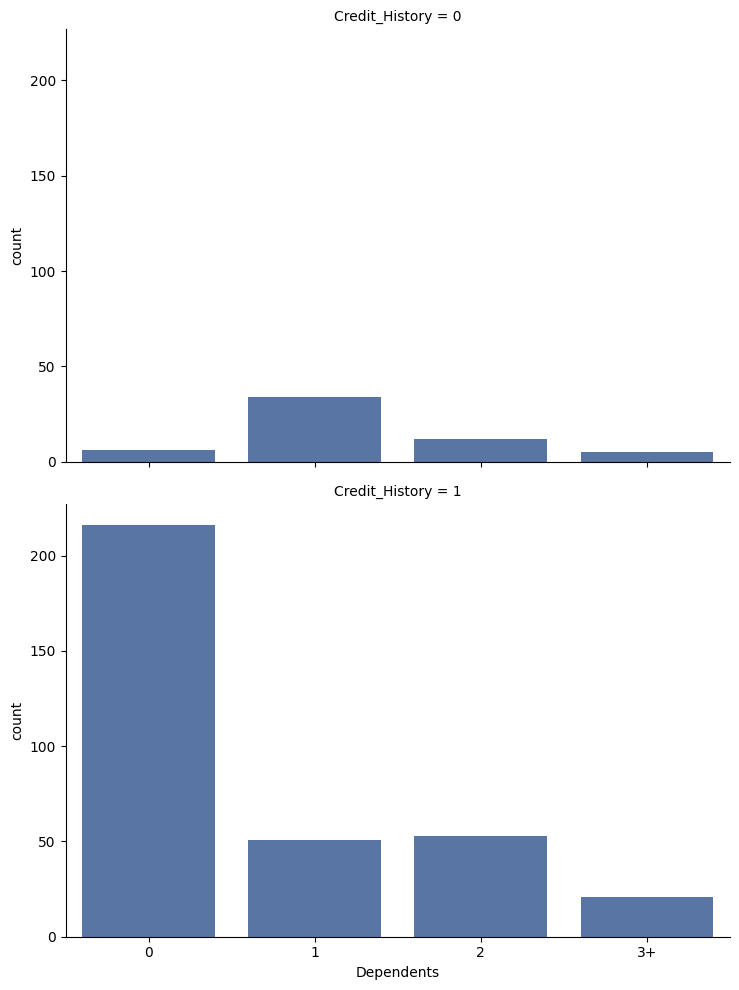

In [57]:
# we will add one significant features (credit history) to see if this variable affects the number of dependents feature.
g = sns.FacetGrid(data_without, row = "Credit_History", height = 5, aspect = 1.5)
g.map_dataframe(sns.countplot, x = 'Dependents')
plt.show()

**Note :** From the visualization above, we can see that a person whose number of depedendents is 2 has more good credit score counts than a person whose number of dependents are 1 & 3. Furthermore, a person whose number of dependents are 1 has more bad credit score count than a person whose number of depedents are 0, 2, and 3. From those 2 informations and the previous statistical test on credit history feature, credit history feature has an effect on number of dependents feature that will make a person whose number of dependents is 2 who is more likely to be accepted for loan than a person who has 1 & 3 dependents. In conclusion, we already found what caused the effect on why a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan. However, we will take a deep look to another significant feature that is property are whether this features also has a same effect to number of dependents feature.

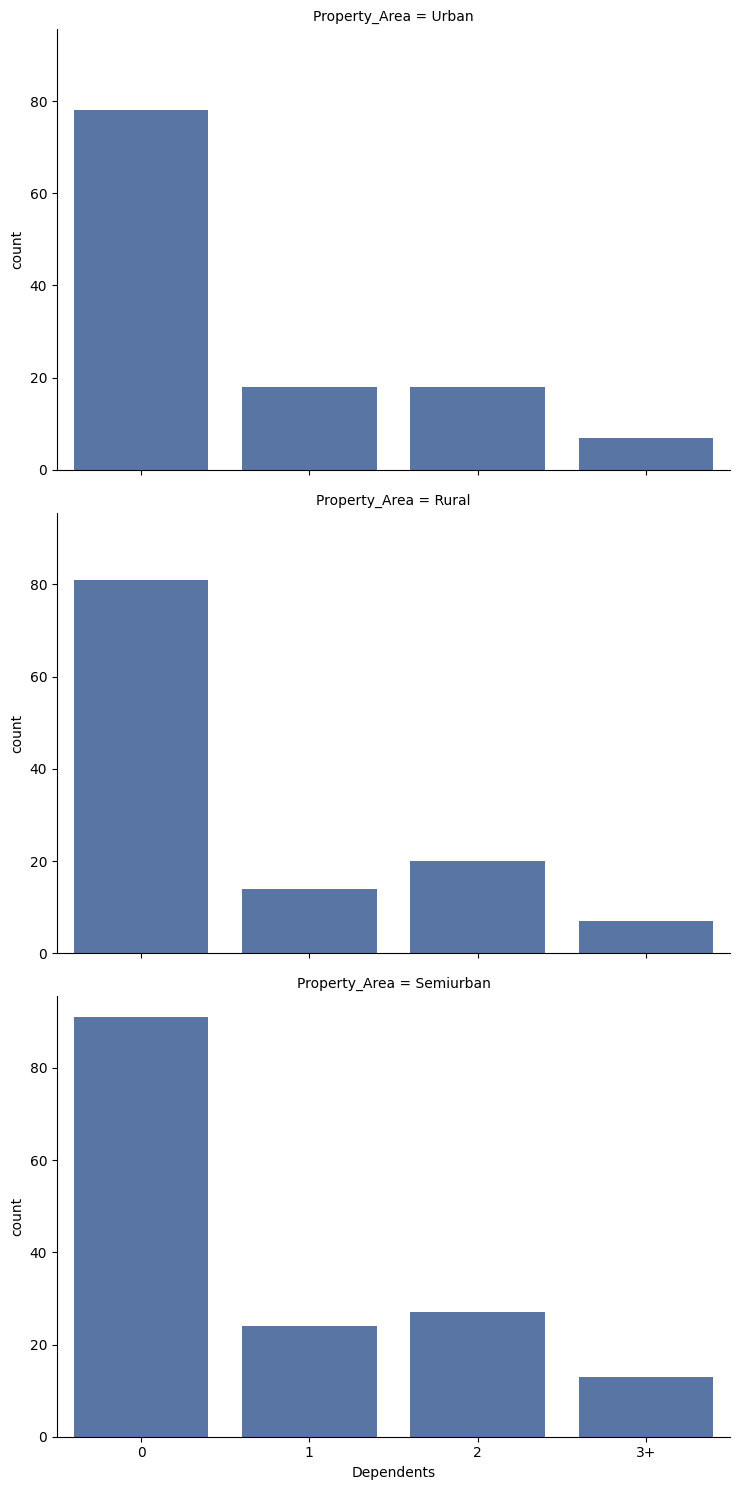

In [58]:
# we will add one significant features (credit history) to see if this variable affects the number of dependents feature.
g = sns.FacetGrid(data_without, row = "Property_Area", height = 5, aspect = 1.5)
g.map_dataframe(sns.countplot, x = 'Dependents', order = ['0','1','2','3+'])
plt.show()

**Note :** From the visualization above, we can see that a person whose number of depedendents is 2 has more counts living in semi-urban area than a person whose number of dependents are 1 & 3. From that information and the previous statistical test on property area feature, property area feature may has a small effect on number of dependents feature that will make a person whose number of dependents is 2 who is more likely to be accepted for loan than a person who has 1 & 3 dependents. In conclusion, credit history and property area features has an effect on number of dependents feature why a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan.

## Outliers Analysis.
In this section we will analyze more on outliers data. Outlier is an extream data value that can be very small or very large or distinc to the rests. outlier is still a valid data and may have crucial information. First, we will look the statistics of the outliers, then we will do data exploration to gain any insights.

In [59]:
# data info and Common statistics.
print("Data dimension :")
print(outliers.shape)
print("="*25)
print("Data info :")
print(outliers.info())

Data dimension :
(216, 13)
Data info :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 5 to 611
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            216 non-null    object 
 1   Gender             216 non-null    object 
 2   Married            216 non-null    object 
 3   Dependents         216 non-null    object 
 4   Education          216 non-null    object 
 5   Self_Employed      216 non-null    object 
 6   ApplicantIncome    216 non-null    int64  
 7   CoapplicantIncome  216 non-null    float64
 8   LoanAmount         216 non-null    float64
 9   Loan_Amount_Term   216 non-null    float64
 10  Credit_History     216 non-null    int32  
 11  Property_Area      216 non-null    object 
 12  Loan_Status        216 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 22.8+ KB
None


In [60]:
stats_outliers = outliers.describe().T
display(stats_outliers)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,216.0,8520.328704,9377.966129,150.0,3388.75,6025.0,10000.0,81000.0
CoapplicantIncome,216.0,2369.374074,4568.863393,0.0,0.00,350.5,3762.5,41667.0
LoanAmount,216.0,190.486111,121.517382,9.0,111.00,164.5,244.5,700.0
Loan_Amount_Term,216.0,310.000000,101.030965,12.0,180.00,360.0,360.0,480.0
Credit_History,216.0,0.851852,0.356072,0.0,1.00,1.0,1.0,1.0


**Note :** From the table above, we already got one information that can gain an insight from the data. If we look at the credit history feauture, we can see that almost 85 % of people have a good credit history. from the previous section, we know that credit history is significant to tell whether a person can get a loan or not. So, the hypothesis is there will be more people who get a loan than people who dont. To verify our hypothesis, we need to explore the data more broadly.

In [61]:
outliers_copy = outliers.copy()

In [62]:
outliers_copy['Credit_History'] = outliers_copy['Credit_History'].astype(str)

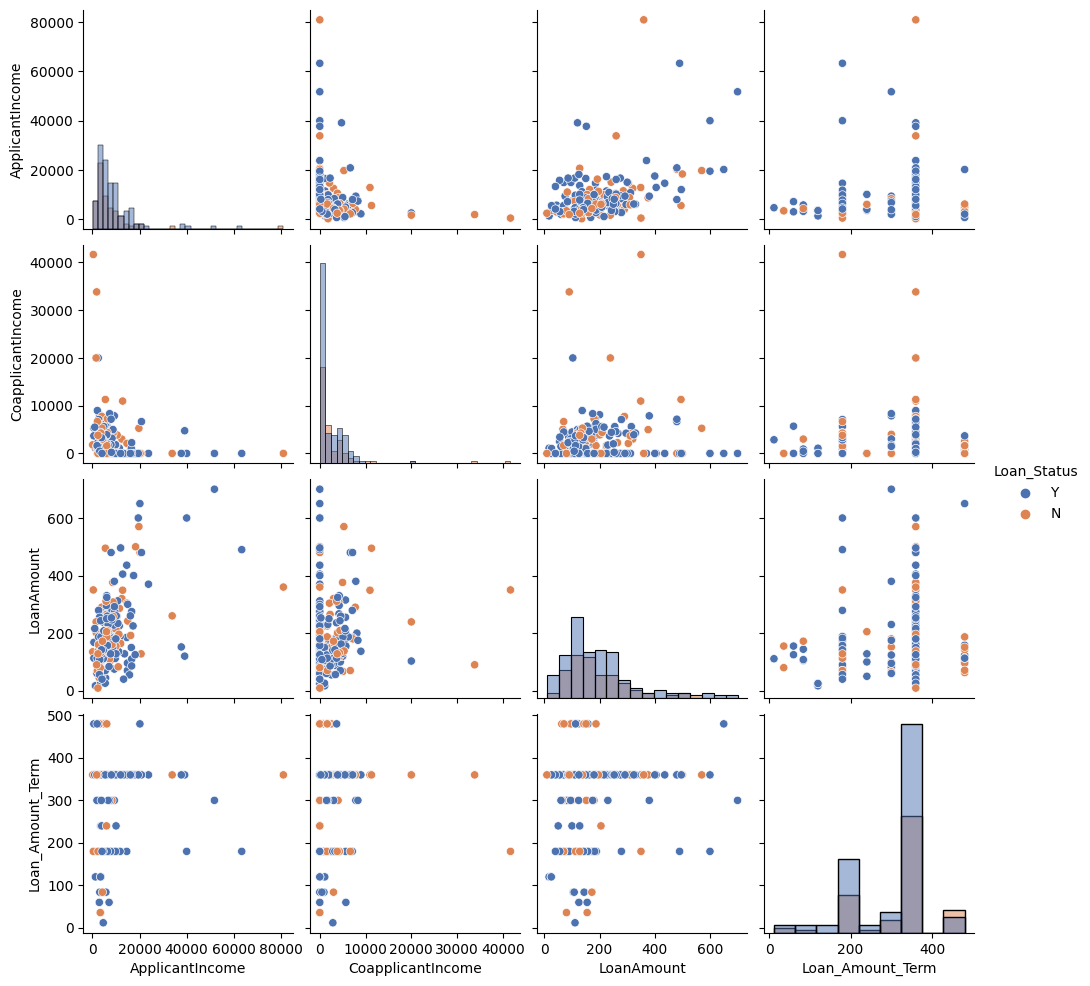

In [63]:
sns.pairplot(outliers_copy.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']], hue = 'Loan_Status', diag_kind = 'hist')
plt.show()

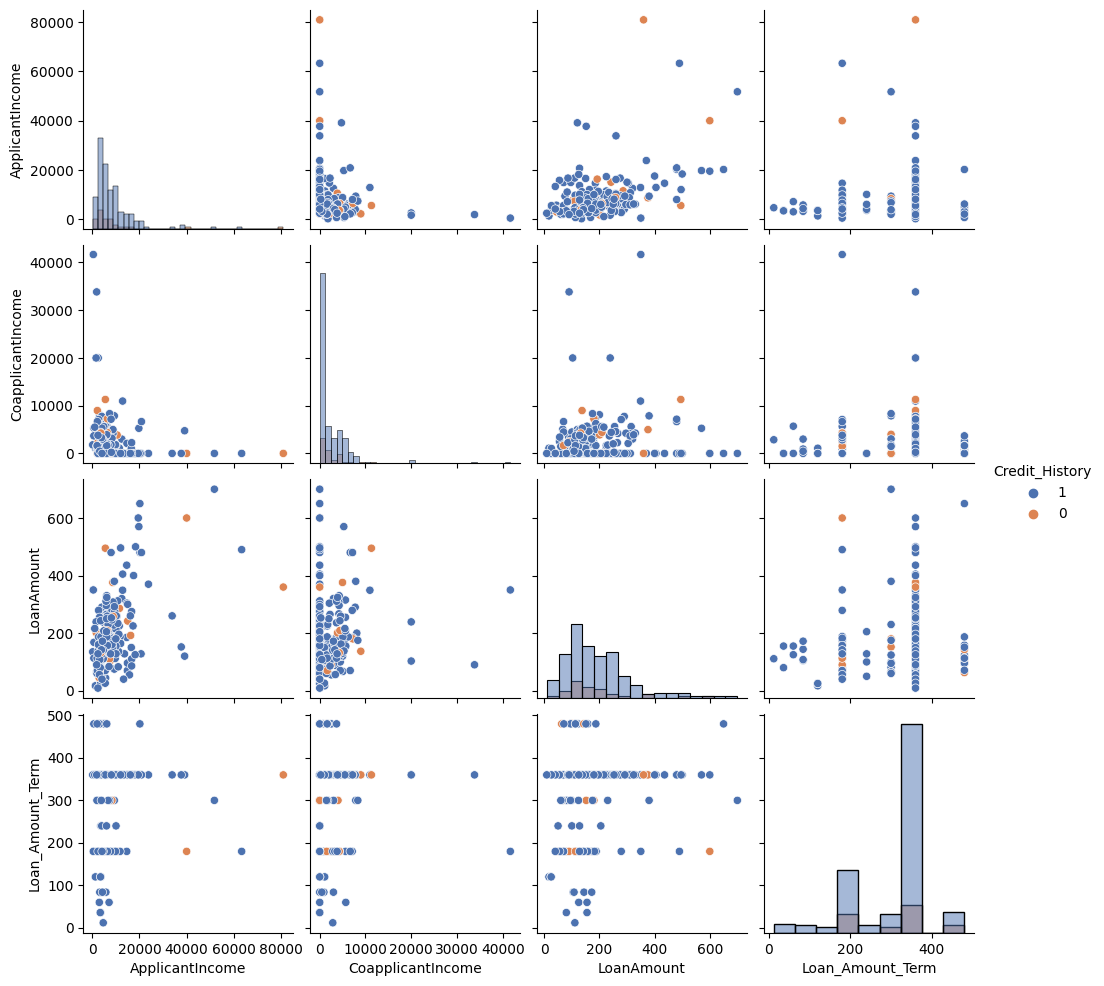

In [64]:
sns.pairplot(outliers_copy.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']], hue = 'Credit_History', diag_kind = 'hist')
plt.show()

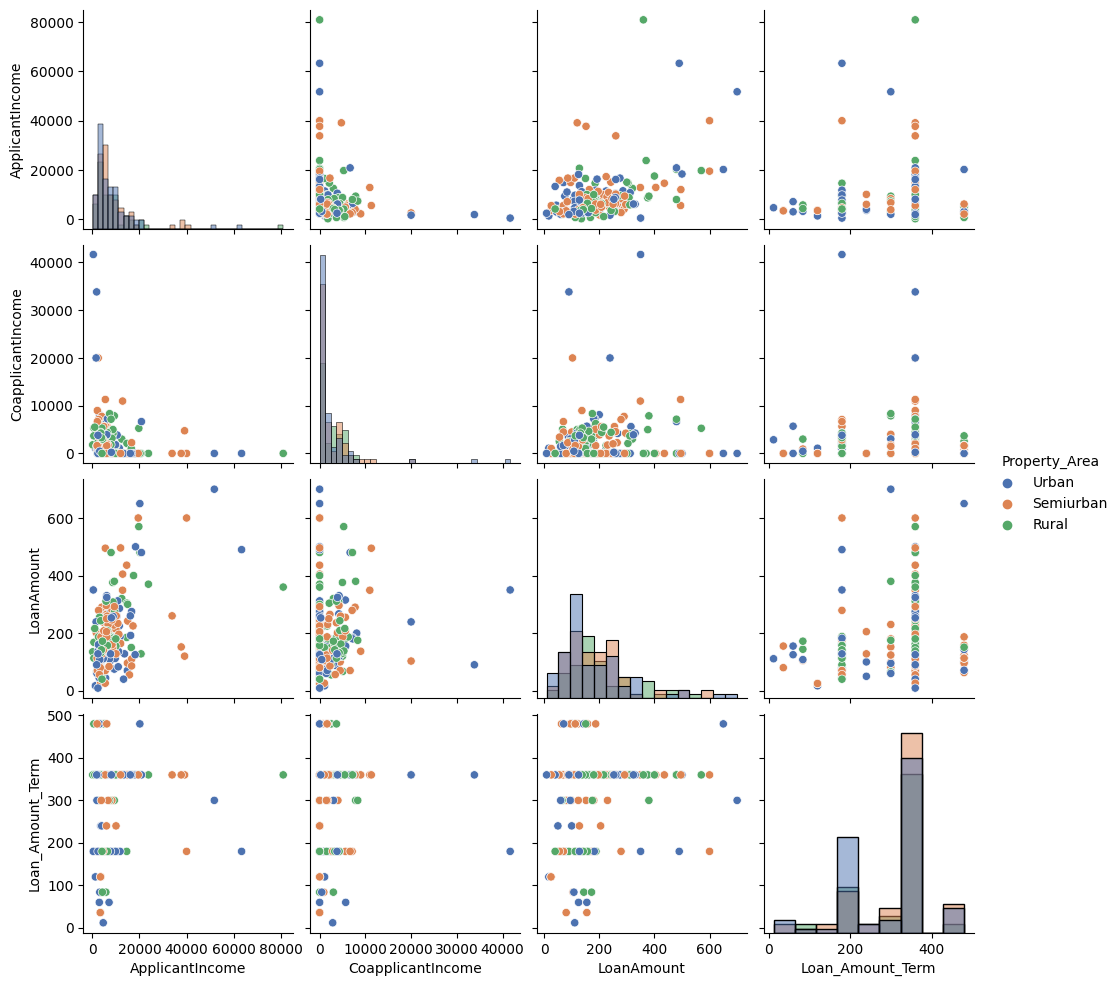

In [65]:
sns.pairplot(outliers_copy.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']], hue = 'Property_Area', diag_kind = 'hist')
plt.show()

**Note :** 

- plot 1 : there are still many outliers found on the numeric features. each of the histograms show the data is positive skewed.

- plot 2 : we can't conclude that Loan Status has different value on each level based on 4 numeric features (Applicant Income, Coapplicant Income, Loan Amount Loan Term).

- Plot 3 & 4 : We also can't conclude that each of 2 categorical features (Credit History, Property Area) has a different value based on 4 numeric features (Applicant Income, Coapplicant Income, Loan Amount, and Loan Term).

But there is a unique data point that may become an interest. First, the biggest value for applicant income (80k) got no loan, bad credit history, lives on rural area, a year loan term, and +- 380 loan. if we see the applicant income, loan amount, and loan term of this person, we may say that this person should be accepted for loan. However, this person lives in rural area and has a bad credit card history. Because these 2 categorical features (property area & credit card status) have a significant effect whether a person gets a loan or not, this makes this person doesn't get loan.

Conclusion : we can't conclude that Loan status is being influenced by the 4 numeric features (Applicant Income, Coapplicant Income, Loan Amount, and Loan term) because a person who get a loan permission and a person who dont have is almost simillar value based on the 4 numeric features. that being said, there is a unique data point who has these feautures : applicant income (80k) got no loan, bad credit history, lives on rural area, a year loan term, and +- 380 loan, but doesn't get a loan permission because this person lives in rural area and has a bad credit history. At the end, these 2 categorical features (Property Area and Credit History) are important to decide whether a person will get a permission to loan or not.






## Outliers Analysis On Categorical Features.
In this section we will take a deeper look about the data with categorical features. We are hoping to find some insights after the analysis.

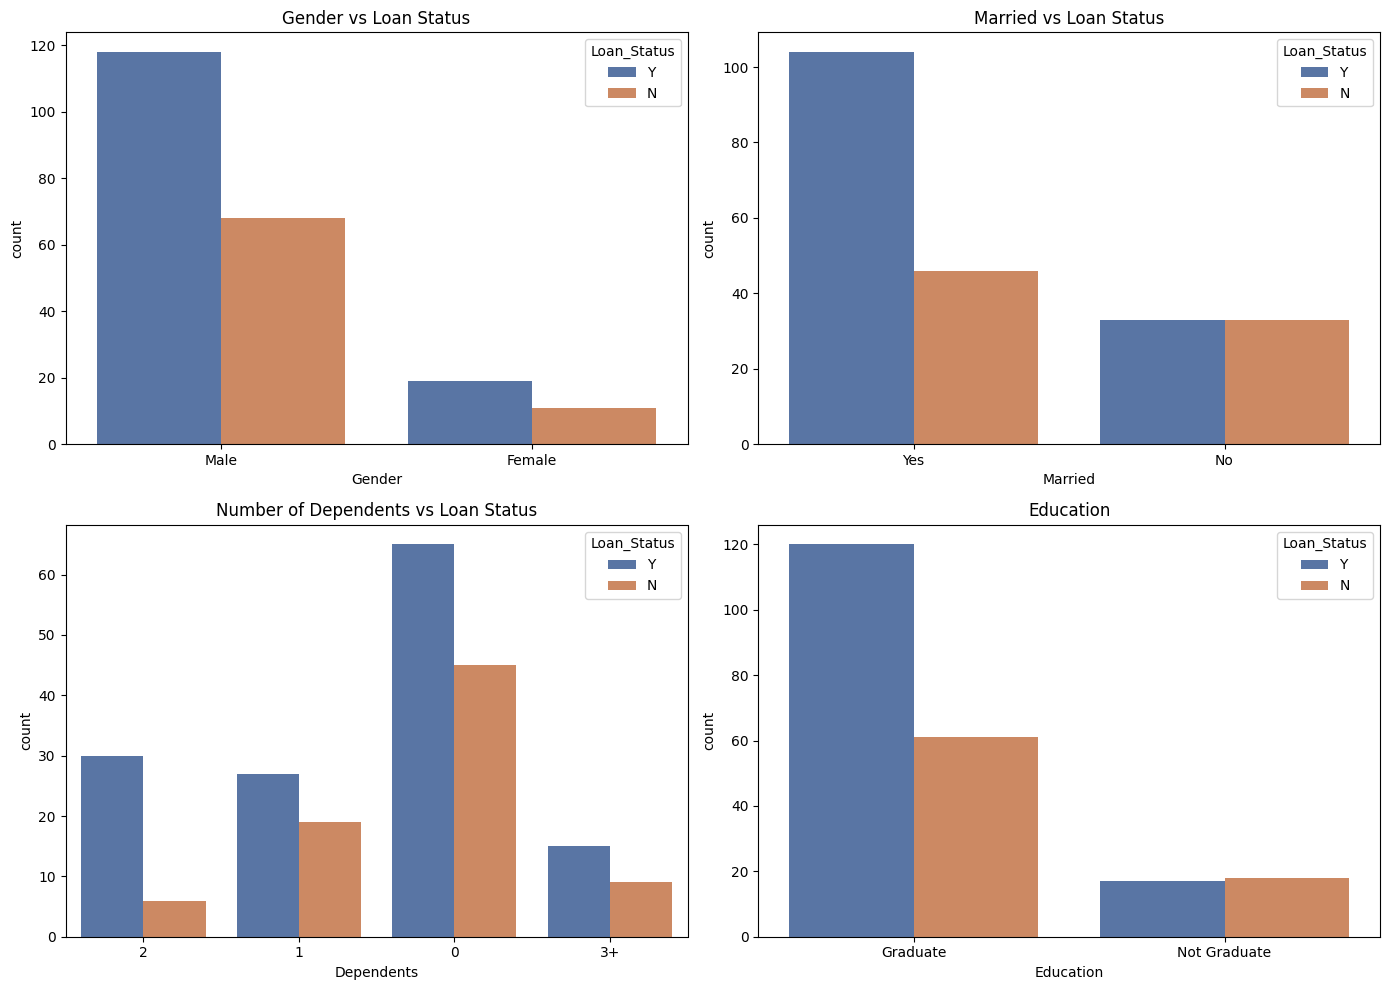

In [66]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

sns.countplot(x = 'Gender', hue = 'Loan_Status', data = outliers_copy, ax = ax[0,0])
sns.countplot(x = 'Married', hue = 'Loan_Status', data = outliers_copy, ax = ax[0,1])
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = outliers_copy, ax = ax[1,0])
sns.countplot(x = 'Education', hue = 'Loan_Status', data = outliers_copy, ax = ax[1,1])

ax[0,0].set_title('Gender vs Loan Status')
ax[0,1].set_title('Married vs Loan Status')
ax[1,0].set_title('Number of Dependents vs Loan Status')
ax[1,1].set_title('Education')

plt.tight_layout()
plt.show()

**Note :** Based on visualizations above, we will try to intepret one by one.
1. Gender vs Loan Status : From the visualization, we can see that male has a tendency to be accepted for loan than female. However, male also has a tendency not to be accepted for loan than female. This information raises a question : is loan status dependent to gender? or not?. To answer this question we will use statistical test called Chi-Square test to see if 2 variabels are dependent or not. 
2. Married vs Loan Status : From the visualization, we can see that a married person has a tedency to be accepted for loan than a single person. However, a single person has a tencdency not to be accepted for a loan based on the counts of 'No' is higher than the counts of 'Yes'. This information raises a question : is loan status dependent to married? or not?.
3. Dependents vs Loan Status : From the visualization, we can see that a person ho has 0 dependents has a tendency to be accepted for loan than the rest. However, a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents. This information raises 2 questions : First, is loan status dependent to number of depedents? or not ?. Second, What caused that a person who has 2 dependents is more likely to be accepted for loan than a person who has 1 & 3 dependents, whereas the lesser number of dependents is more likely to be accepted for loan.
4. Education vs Loan Status : From the visualization, we can see that a person who is graduated has a tedency to be accepted for loan than a person who is not graduated person. However, a person who is graduated also has a tendency not to be accepted for loan than a person who is not graduated. This information raises a question : is loan status dependent to education? or not?.

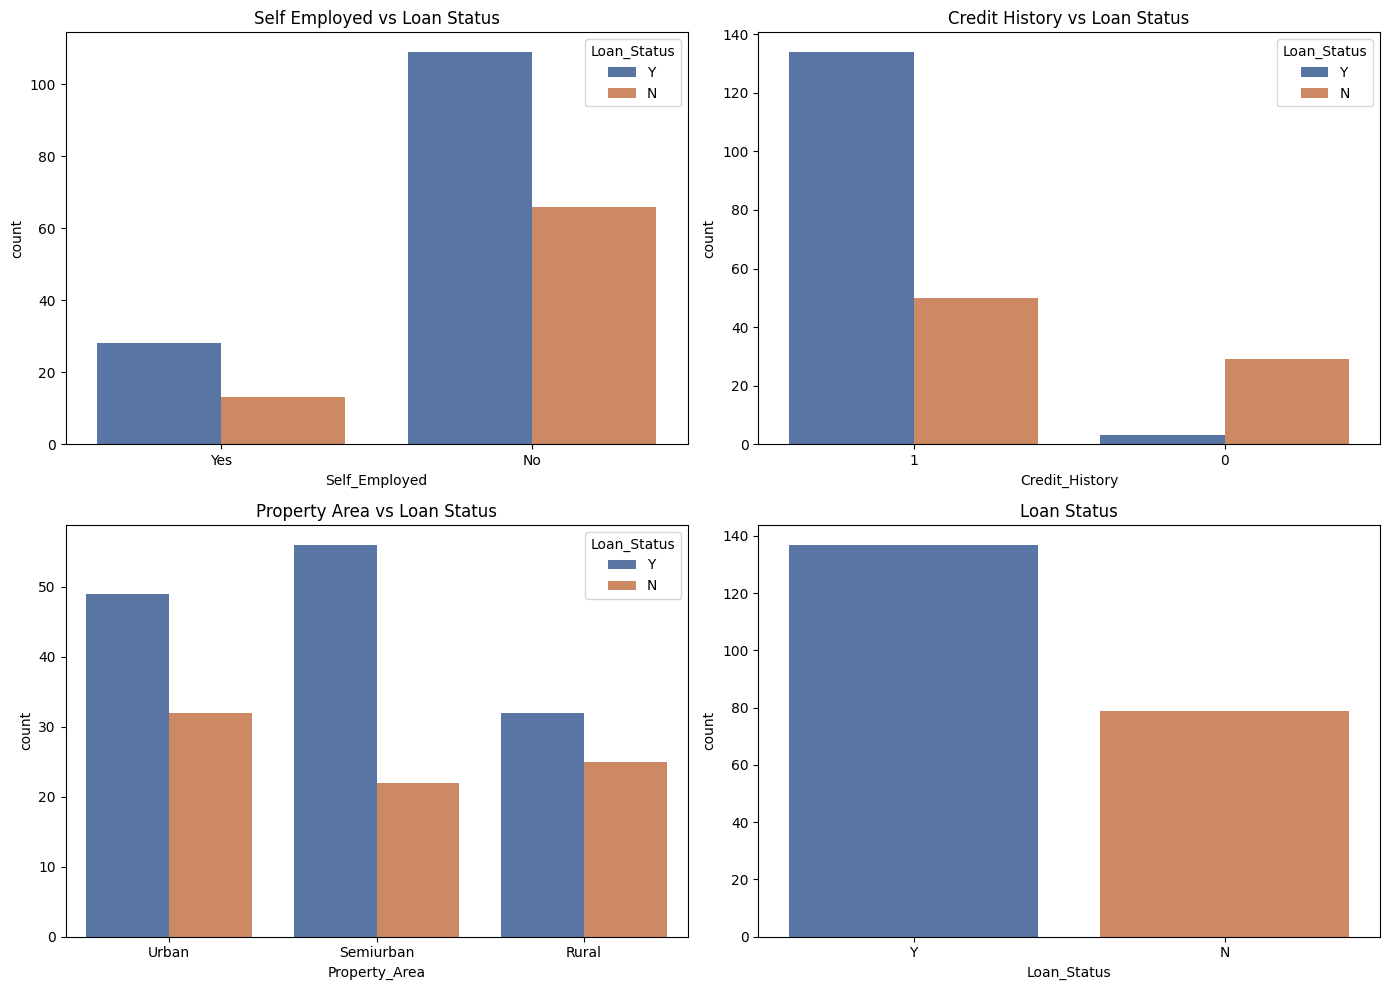

In [67]:
fig, ax = plt.subplots(2,2, figsize = (14,10))

sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = outliers_copy, ax = ax[0,0])
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = outliers_copy, ax = ax[0,1])
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = outliers_copy, ax = ax[1,0])
sns.countplot(x = 'Loan_Status', data = outliers_copy, ax = ax[1,1])

ax[0,0].set_title('Self Employed vs Loan Status')
ax[0,1].set_title('Credit History vs Loan Status')
ax[1,0].set_title('Property Area vs Loan Status')
ax[1,1].set_title('Loan Status')

plt.tight_layout()
plt.show()

**Note :** Based on visualizations above, we will try to intepret one by one.
1. Self Employed vs Loan Status : From the visualization, we can see that a person who is not self-employed has a tendency to be accepted for loan than a person who is self-employed. However, a person who is not self-employed also has a tendency not to be accepted for loan than a person who is self-employed. This information raises a question : is loan status dependent to self-employment? or not?. To answer this question we will use statistical test called Chi-Square test to see if 2 variabels are dependent or not. 
2. Credit History vs Loan Status : From the visualization, we can see that a person who has a good (1) credit history has a tendency to be accepted for loan than a person who doeesn't. Furthermore, a person who has a bad credit history has tendency not to be accepted for loan. This information raises a question : is loan status dependent to credit history? or not?.
3. Property Area vs Loan Status : From the visualization, we can see that a person who lives in semiurban arean has a tendency to be accepted for loan than the rest. Furthermore, a person whow lives in semiurban area 2 has a less tendency to not be accepted for loan than the rest. This information raises a question : is loan status dependent to property area? or not ?. 
4. Previously, we have a hypothesis that the counts of people who get a loan permission is higher than the number of people who doesn't(based on 85 % of people have a good credit score history). If we look at the fourth visualization, we can see that the number of people who get a loan permission is higher than the number of people who doesn't. So, we can verify that our hypothesis is true.

Noted that we will no do statistical test on every pair of features because the result of visualizations have a similar pattern. However, we will do a statistical test on loan status and married feautures because it has a different pattern than the previous visualization about loan status and married.

In [68]:
# Chi-Square test for Married vs Loan Status.
married_loan_outlier= outliers_copy.groupby(['Married','Loan_Status'])['Loan_Status'].count().unstack()
married_results_outlier= chi2_contingency(married_loan_outlier.values)
odds_ratio_married_outlier = (married_loan_outlier['Y']/married_loan_outlier['N']).loc['Yes']/(married_loan_outlier['Y']/married_loan_outlier['N']).loc['No']
print("Chi-Square test result :")
print(f"Statistic\t= {married_results_outlier[0]}")
print(f"P-val\t\t= {married_results_outlier[1]}")
if married_results_outlier[1] < 0.05:
    print("Decision\t= Reject the null hypothesis that 2 variabels are independent")
else:
    print("Decision\t= Fail to reject the null hypothesis that 2 variabels are independent")
print(f"Odds Ratio\t= {odds_ratio_married_outlier}") 

Chi-Square test result :
Statistic	= 6.575160978723765
P-val		= 0.01034116499425634
Decision	= Reject the null hypothesis that 2 variabels are independent
Odds Ratio	= 2.260869565217391


**Note :** From the test above, we reject the null hypothesis that 2 variables are independent with alpha 0.05. However, the previous test is fail to reject the null hypothesis that 2 variables are independent. it brings a question that why this is happening? to answer this quesiton , it may happen because of outliers removal process from the beginning of EDA section. Because we chose the alpha = 0.05, it might not capture most of the outliers. Hence, it caused the counts of single people with 'Yes' loan status is lower than the 'No' loan status. 

## The conclusion.
From the exploratory and explanatory process that we have done, we can conclude 3 main insights. First, there is no significant effect of all numeric features (applicant income, coapplicant income, loan amount, loan term) on loan status feature. Second, credit history and  property area are the two significant features that are best to describe whether a person gets a loan permission or not. Last but not least, from outlier analysis we can conclude that almost all features have the same effect to the data without outlier, but there is a unique data point who has these feautures : applicant income (80k) got no loan, bad credit history, lives on rural area, a year loan term, and +- 380 loan, but doesn't get a loan permission because this person lives in rural area and has a bad credit history.

# Class Balancing (Undersampling, Oversampling With SMOTENC, Undersampling & Oversampling WITH SMOTENC)
In this section, we will try to explore about class balancing technique to address imbalance class distribution in our dataset. We will try to do 3 option and compare the prediction result at the end.

In [69]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [70]:
print("Class proportion in the data :")
print(data_without['Loan_Status'].value_counts())

Class proportion in the data :
Y    285
N    113
Name: Loan_Status, dtype: int64


In [71]:
X = data_without.copy().drop(['Loan_Status','Loan_ID'],axis = 1)
Y = data_without.copy()[['Loan_Status']]
print("Data Info\t:")
print(X.info())

Data Info	:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             398 non-null    object 
 1   Married            398 non-null    object 
 2   Dependents         398 non-null    object 
 3   Education          398 non-null    object 
 4   Self_Employed      398 non-null    object 
 5   ApplicantIncome    398 non-null    int64  
 6   CoapplicantIncome  398 non-null    float64
 7   LoanAmount         398 non-null    float64
 8   Loan_Amount_Term   398 non-null    float64
 9   Credit_History     398 non-null    int32  
 10  Property_Area      398 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 35.8+ KB
None


## Preprocessing.

In [72]:
X['Credit_History'] = X['Credit_History'].astype(str)
Y['Loan_Status'] = Y['Loan_Status'].replace({"Y" : 1, "N" : 0})

In [73]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             398 non-null    object 
 1   Married            398 non-null    object 
 2   Dependents         398 non-null    object 
 3   Education          398 non-null    object 
 4   Self_Employed      398 non-null    object 
 5   ApplicantIncome    398 non-null    int64  
 6   CoapplicantIncome  398 non-null    float64
 7   LoanAmount         398 non-null    float64
 8   Loan_Amount_Term   398 non-null    float64
 9   Credit_History     398 non-null    object 
 10  Property_Area      398 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 37.3+ KB
None


In [74]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.1, random_state = 32)
print("Training data dimension\t:")
print(f"X = {train_x.shape}")
print(f"Y = {train_y.shape}")
print("Testing data dimension\t:")
print(f"X = {test_x.shape}")
print(f"Y = {test_y.shape}")

Training data dimension	:
X = (358, 11)
Y = (358, 1)
Testing data dimension	:
X = (40, 11)
Y = (40, 1)


In [75]:
# Undersampling the majority class.
res_und = RandomUnderSampler(sampling_strategy = 0.95, random_state = 32)
x_res_und, y_res_und = res_und.fit_resample(train_x,train_y)

# Oversampling the minority class.
res_over = SMOTENC(sampling_strategy = 1, categorical_features = [0,1,2,3,4,9,10], random_state = 32, k_neighbors = 5)
x_res_over, y_res_over = res_over.fit_resample(train_x,train_y)

# Oversampling the minority class.
res_over_under_1 = SMOTENC(sampling_strategy = 0.9, categorical_features = [0,1,2,3,4,9,10], random_state = 32, k_neighbors = 5)
x_res_over_under_1, y_res_over_under_1= res_over_under_1.fit_resample(train_x,train_y)

res_over_under_2 = RandomUnderSampler(sampling_strategy = 0.9, random_state = 32)
x_res_over_under_2, y_res_over_under_2= res_over_under_2.fit_resample(x_res_over_under_1,y_res_over_under_1)

In [76]:
# Class Proportion For Undersampling.
print("Class proportion for undersampling :")
print(f"No\t= {y_res_und.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_und.value_counts().loc[1].values}") 
print("="*20)
# Class Proportion For Oversampling.
print("Class proportion for Oversampling :")
print(f"No\t= {y_res_over.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_over.value_counts().loc[1].values}") 
print("="*20)
# Class Proportion For Oversampling and Undersampling.
print("Class proportion for oversampling & undersampling :")
print(f"No\t= {y_res_over_under_2.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_over_under_2.value_counts().loc[1].values}") 
print("="*20)

Class proportion for undersampling :
No	= [100]
Yes	= [105]
Class proportion for Oversampling :
No	= [258]
Yes	= [258]
Class proportion for oversampling & undersampling :
No	= [232]
Yes	= [257]


In [77]:
# Standardize the numerical data.
sc_under = StandardScaler()
sc_over  = StandardScaler()
sc_over_under = StandardScaler()
test_x_under, test_y_under = (test_x.copy(),test_y.copy())
test_x_over, test_y_over = (test_x.copy(), test_y.copy())
test_x_over_under, test_y_over_under = (test_x.copy(), test_y.copy())
                                        
# For undersampling.
x_res_und.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']] = sc_under.fit_transform(x_res_und.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']])
test_x_under.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']] = sc_under.transform(test_x_under.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']])

# For oversampling.
x_res_over.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']]= sc_over.fit_transform(x_res_over.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']])
test_x_over.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']] = sc_over.transform(test_x_over.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']])


# For oversampling and undersampling.
x_res_over_under_2.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']]= sc_over_under.fit_transform(x_res_over_under_2.loc[:,['LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']])
test_x_over_under.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']] = sc_over_under.transform(test_x_over_under.loc[:, ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']])

In [78]:
# data undersamplling
display(x_res_und.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Not Graduate,No,-0.905440,0.965519,1.687534,0.0,0,Urban
1,Male,Yes,0,Not Graduate,No,-0.556832,-0.563570,-1.584144,0.0,1,Rural
2,Male,Yes,0,Not Graduate,Yes,0.811999,-1.019659,0.464211,0.0,1,Urban
3,Male,Yes,3+,Graduate,No,1.199760,-1.019659,-0.787562,0.0,1,Urban
4,Male,Yes,0,Graduate,No,-0.088508,0.151196,-1.897088,0.0,1,Rural


In [79]:
# data oversampling
display(x_res_over.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Not Graduate,No,-0.940474,0.984216,1.719272,0.0,0,Urban
1,Male,Yes,0,Graduate,No,-1.190902,0.360055,-0.711535,0.0,1,Semiurban
2,Male,Yes,2,Graduate,No,0.152232,-0.978275,-0.711535,0.0,1,Semiurban
3,Male,Yes,1,Graduate,Yes,-0.986359,-0.978275,0.203592,0.0,1,Semiurban
4,Male,Yes,0,Not Graduate,Yes,0.802412,-0.978275,-0.711535,0.0,1,Urban


In [80]:
# data oversampling and undersampling
display(x_res_over_under_2.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Not Graduate,No,-0.941031,0.988083,1.729315,0.0,0,Urban
1,Male,Yes,0,Not Graduate,No,-0.584758,-0.519221,-1.565125,0.0,1,Rural
2,Male,Yes,0,Not Graduate,Yes,0.814172,-0.968811,0.497481,0.0,1,Urban
3,Male,Yes,3+,Graduate,No,1.210459,-0.968811,-0.763001,0.0,1,Urban
4,Male,Yes,0,Graduate,No,-0.106136,0.185362,-1.880245,0.0,1,Rural


In [81]:
# Data Preprocessing for every sampling techniques and testing data.

# Undersampling.
x_res_und['Gender'] = x_res_und['Gender'].replace({'Male' : 1, 'Female' : 0})
x_res_und['Married'] = x_res_und['Married'].replace({'Yes' : 1, 'No' : 0})
x_res_und['Dependents'] = x_res_und['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
x_res_und['Education'] = x_res_und['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
x_res_und['Self_Employed'] = x_res_und['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
x_res_und['Credit_History'] = x_res_und['Credit_History'].astype(int)

test_x_under['Gender'] = test_x_under['Gender'].replace({'Male' : 1, 'Female' : 0})
test_x_under['Married'] = test_x_under['Married'].replace({'Yes' : 1, 'No' : 0})
test_x_under['Dependents'] = test_x_under['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
test_x_under['Education'] = test_x_under['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
test_x_under['Self_Employed'] = test_x_under['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
test_x_under['Credit_History'] = test_x_under['Credit_History'].astype(int)

# oversampling.
x_res_over['Gender'] = x_res_over['Gender'].replace({'Male' : 1, 'Female' : 0})
x_res_over['Married'] = x_res_over['Married'].replace({'Yes' : 1, 'No' : 0})
x_res_over['Dependents'] = x_res_over['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
x_res_over['Education'] = x_res_over['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
x_res_over['Self_Employed'] = x_res_over['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
x_res_over['Credit_History'] = x_res_over['Credit_History'].astype(int)
test_x_over['Gender'] = test_x_over['Gender'].replace({'Male' : 1, 'Female' : 0})
test_x_over['Married'] = test_x_over['Married'].replace({'Yes' : 1, 'No' : 0})
test_x_over['Dependents'] = test_x_over['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
test_x_over['Education'] = test_x_over['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
test_x_over['Self_Employed'] = test_x_over['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
test_x_over['Credit_History'] = test_x_over['Credit_History'].astype(int)

# oversampling.
x_res_over_under_2['Gender'] = x_res_over_under_2['Gender'].replace({'Male' : 1, 'Female' : 0})
x_res_over_under_2['Married'] = x_res_over_under_2['Married'].replace({'Yes' : 1, 'No' : 0})
x_res_over_under_2['Dependents'] = x_res_over_under_2['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
x_res_over_under_2['Education'] = x_res_over_under_2['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
x_res_over_under_2['Self_Employed'] = x_res_over_under_2['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
x_res_over_under_2['Credit_History'] = x_res_over_under_2['Credit_History'].astype(int)
test_x_over_under['Gender'] = test_x_over_under['Gender'].replace({'Male' : 1, 'Female' : 0})
test_x_over_under['Married'] = test_x_over_under['Married'].replace({'Yes' : 1, 'No' : 0})
test_x_over_under['Dependents'] = test_x_over_under['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
test_x_over_under['Education'] = test_x_over_under['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
test_x_over_under['Self_Employed'] = test_x_over_under['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
test_x_over_under['Credit_History'] = test_x_over_under['Credit_History'].astype(int)

In [82]:
# One-Hot Encoding  for the categorical features
x_res_und  = pd.get_dummies(x_res_und, drop_first = True)
x_res_over = pd.get_dummies(x_res_over, drop_first = True)
x_res_over_under_2 = pd.get_dummies(x_res_over_under_2, drop_first = True)
test_x_under = pd.get_dummies(test_x_under, drop_first = True)
test_x_over = pd.get_dummies(test_x_over, drop_first = True)
test_x_over_under = pd.get_dummies(test_x_over_under, drop_first = True)

In [83]:
# Data info
print("Data for undersampling :")
print(x_res_und.info())
print("="*25)
print("Data for oversampling :")
print(x_res_over.info())
print("="*25)
print("Data for oversampling and undersampling :")
print(x_res_over_under_2.info())
print("="*25)

Data for undersampling :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   205 non-null    int64  
 1   Married                  205 non-null    int64  
 2   Dependents               205 non-null    int64  
 3   Education                205 non-null    int64  
 4   Self_Employed            205 non-null    int64  
 5   ApplicantIncome          205 non-null    float64
 6   CoapplicantIncome        205 non-null    float64
 7   LoanAmount               205 non-null    float64
 8   Loan_Amount_Term         205 non-null    float64
 9   Credit_History           205 non-null    int32  
 10  Property_Area_Semiurban  205 non-null    uint8  
 11  Property_Area_Urban      205 non-null    uint8  
dtypes: float64(4), int32(1), int64(5), uint8(2)
memory usage: 15.7 KB
None
Data for oversampling :
<class 'pandas

# Model Building

In [84]:
# Building models with defaut parameters and evaluate the classification report.
dt = DecisionTreeClassifier(random_state = 32)
rf = RandomForestClassifier(random_state = 32, n_jobs = -1)
logreg = LogisticRegression()
svc = SVC()

## Classifier = Decision Tree

In [85]:
# Model for undersampling.
y_pred_train_under = dt.fit(x_res_und,y_res_und).predict(x_res_und)
y_pred_test_under = dt.predict(test_x_under)
clf_report_under = classification_report(y_res_und, y_pred_train_under)
clf_report_under_test = classification_report(test_y_under, y_pred_test_under)
roc_score_under = roc_auc_score(y_res_und,y_pred_train_under)
roc_score_under_test = roc_auc_score(test_y_under, y_pred_test_under)
cv_result_under = np.mean(cross_val_score(dt, X = x_res_und, y = y_res_und, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_dt_under = np.round(precision_score(test_y_under, y_pred_test_under), 2)
recall_dt_under = np.round(recall_score(test_y_under, y_pred_test_under), 2)
accuracy_dt_under = np.round(accuracy_score(test_y_under, y_pred_test_under), 2)


# Model for oversampling.
y_pred_train_over = dt.fit(x_res_over,y_res_over).predict(x_res_over)
y_pred_test_over = dt.predict(test_x_over)
clf_report_over = classification_report(y_res_over, y_pred_train_over)
clf_report_over_test = classification_report(test_y_over, y_pred_test_over)
roc_score_over = roc_auc_score(y_res_over,y_pred_train_over)
roc_score_over_test = roc_auc_score(test_y_over, y_pred_test_over)
cv_result_over = np.mean(cross_val_score(dt, X = x_res_over, y = y_res_over, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_dt_over = np.round(precision_score(test_y_over, y_pred_test_over), 2)
recall_dt_over = np.round(recall_score(test_y_over, y_pred_test_over), 2)
accuracy_dt_over = np.round(accuracy_score(test_y_over, y_pred_test_over), 2)

# Model for oversampling & undersampling.
y_pred_train_over_under = dt.fit(x_res_over_under_2,y_res_over_under_2).predict(x_res_over_under_2)
y_pred_test_over_under = dt.predict(test_x_over_under)
clf_report_over_under = classification_report(y_res_over_under_2, y_pred_train_over_under)
clf_report_over_under_test = classification_report(test_y_over_under, y_pred_test_over_under)
roc_score_over_under = roc_auc_score(y_res_over_under_2,y_pred_train_over_under)
roc_score_over_under_test = roc_auc_score(test_y_over_under, y_pred_test_over_under)
cv_result_over_under = np.mean(cross_val_score(dt, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_dt_over_under = np.round(precision_score(test_y_over_under, y_pred_test_over_under), 2)
recall_dt_over_under = np.round(recall_score(test_y_over_under, y_pred_test_over_under), 2)
accuracy_dt_over_under = np.round(accuracy_score(test_y_over_under, y_pred_test_over_under), 2)

In [86]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_under)
print("="*25)
print("ROC AUC Score :")
print(roc_score_under)
print("="*25)
print("Cross validation result :")
print(cv_result_under)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_under_test)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_under_test)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

ROC AUC Score :
1.0
Cross validation result :
0.6634146341463415
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.52      0.85      0.65        13
           1       0.89      0.63      0.74        27

    accuracy                           0.70        40
   macro avg       0.71      0.74      0.69        40
weighted avg       0.77      0.70      0.71        40

ROC AUC Score for Testing Data :
0.7378917378917379


In [87]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over)
print("="*25)
print("Cross validation result :")
print(cv_result_over)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_test)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_test)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       258

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516

ROC AUC Score :
1.0
Cross validation result :
0.8005227781926811
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.65      0.85      0.73        13
           1       0.91      0.78      0.84        27

    accuracy                           0.80        40
   macro avg       0.78      0.81      0.79        40
weighted avg       0.83      0.80      0.81        40

ROC AUC Score for Testing Data :
0.811965811965812


In [88]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_under)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_under)
print("="*25)
print("Cross validation result :")
print(cv_result_over_under)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_under_test)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_under_test)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       257

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489

ROC AUC Score :
1.0
Cross validation result :
0.754681253944877
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.89      0.89      0.89        27

    accuracy                           0.85        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.85      0.85      0.85        40

ROC AUC Score for Testing Data :
0.8290598290598289


## Classifier : Random Forest

In [89]:
# Model for undersampling.
y_pred_train_under_rf = rf.fit(x_res_und,np.ravel(y_res_und)).predict(x_res_und)
y_pred_test_under_rf = rf.predict(test_x_under)
clf_report_under_rf = classification_report(y_res_und, y_pred_train_under_rf)
clf_report_under_test_rf = classification_report(test_y_under, y_pred_test_under_rf)
roc_score_under_rf = roc_auc_score(y_res_und,y_pred_train_under_rf)
roc_score_under_test_rf = roc_auc_score(test_y_under, y_pred_test_under_rf)
cv_result_under_rf = np.mean(cross_val_score(rf, X = x_res_und, y = y_res_und, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_rf_under = np.round(precision_score(test_y_under, y_pred_test_under_rf), 2)
recall_rf_under = np.round(recall_score(test_y_under, y_pred_test_under_rf), 2)
accuracy_rf_under = np.round(accuracy_score(test_y_under, y_pred_test_under_rf), 2)


# Model for oversampling.
y_pred_train_over_rf = rf.fit(x_res_over,np.ravel(y_res_over)).predict(x_res_over)
y_pred_test_over_rf = rf.predict(test_x_over)
clf_report_over_rf = classification_report(y_res_over, y_pred_train_over_rf)
clf_report_over_test_rf = classification_report(test_y_over, y_pred_test_over_rf)
roc_score_over_rf = roc_auc_score(y_res_over,y_pred_train_over_rf)
roc_score_over_test_rf = roc_auc_score(test_y_over, y_pred_test_over)
cv_result_over_rf = np.mean(cross_val_score(rf, X = x_res_over, y = y_res_over, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_rf_over = np.round(precision_score(test_y_over, y_pred_test_over_rf), 2)
recall_rf_over = np.round(recall_score(test_y_over, y_pred_test_over_rf), 2)
accuracy_rf_over = np.round(accuracy_score(test_y_over, y_pred_test_over_rf), 2)

# Model for oversampling & undersampling.
y_pred_train_over_under_rf = rf.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_pred_test_over_under_rf = rf.predict(test_x_over_under)
clf_report_over_under_rf = classification_report(y_res_over_under_2, y_pred_train_over_under_rf)
clf_report_over_under_test_rf = classification_report(test_y_over_under, y_pred_test_over_under_rf)
roc_score_over_under_rf = roc_auc_score(y_res_over_under_2,y_pred_train_over_under_rf)
roc_score_over_under_test_rf = roc_auc_score(test_y_over_under, y_pred_test_over_under_rf)
cv_result_over_under_rf = np.mean(cross_val_score(rf, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_rf_over_under = np.round(precision_score(test_y_over_under, y_pred_test_over_under_rf), 2)
recall_rf_over_under = np.round(recall_score(test_y_over_under, y_pred_test_over_under_rf), 2)
accuracy_rf_over_under = np.round(accuracy_score(test_y_over_under, y_pred_test_over_under_rf), 2)

In [90]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_under_rf)
print("="*25)
print("ROC AUC Score :")
print(roc_score_under_rf)
print("="*25)
print("Cross validation result :")
print(cv_result_under_rf)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_under_test_rf)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_under_test_rf)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

ROC AUC Score :
1.0
Cross validation result :
0.7317073170731707
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.65      0.85      0.73        13
           1       0.91      0.78      0.84        27

    accuracy                           0.80        40
   macro avg       0.78      0.81      0.79        40
weighted avg       0.83      0.80      0.81        40

ROC AUC Score for Testing Data :
0.811965811965812


In [91]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_rf)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_rf)
print("="*25)
print("Cross validation result :")
print(cv_result_over_rf)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_test_rf)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_test_rf)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       258

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516

ROC AUC Score :
1.0
Cross validation result :
0.8315347274085138
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.89      0.89      0.89        27

    accuracy                           0.85        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.85      0.85      0.85        40

ROC AUC Score for Testing Data :
0.811965811965812


In [92]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_under_rf)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_under_rf)
print("="*25)
print("Cross validation result :")
print(cv_result_over_under_rf)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_under_test_rf)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_under_test_rf)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       257

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489

ROC AUC Score :
1.0
Cross validation result :
0.8057227014517145
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.89      0.89      0.89        27

    accuracy                           0.85        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.85      0.85      0.85        40

ROC AUC Score for Testing Data :
0.8290598290598289


## Classifier : Logistic Regression

In [93]:
# Model for undersampling.
y_pred_train_under_logreg = logreg.fit(x_res_und,np.ravel(y_res_und)).predict(x_res_und)
y_pred_test_under_logreg = logreg.predict(test_x_under)
clf_report_under_logreg = classification_report(y_res_und, y_pred_train_under_logreg)
clf_report_under_test_logreg = classification_report(test_y_under, y_pred_test_under_logreg)
roc_score_under_logreg = roc_auc_score(y_res_und,y_pred_train_under_logreg)
roc_score_under_test_logreg = roc_auc_score(test_y_under, y_pred_test_under_logreg)
cv_result_under_logreg = np.mean(cross_val_score(logreg, X = x_res_und, y = y_res_und, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_logreg_under = np.round(precision_score(test_y_under, y_pred_test_under_logreg), 2)
recall_logreg_under = np.round(recall_score(test_y_under, y_pred_test_under_logreg), 2)
accuracy_logreg_under = np.round(accuracy_score(test_y_under, y_pred_test_under_logreg), 2)


# Model for oversampling.
y_pred_train_over_logreg = logreg.fit(x_res_over,np.ravel(y_res_over)).predict(x_res_over)
y_pred_test_over_logreg = logreg.predict(test_x_over)
clf_report_over_logreg = classification_report(y_res_over, y_pred_train_over_logreg)
clf_report_over_test_logreg = classification_report(test_y_over, y_pred_test_over_logreg)
roc_score_over_logreg = roc_auc_score(y_res_over,y_pred_train_over_logreg)
roc_score_over_test_logreg = roc_auc_score(test_y_over, y_pred_test_over_logreg)
cv_result_over_logreg = np.mean(cross_val_score(logreg, X = x_res_over, y = y_res_over, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_logreg_over = np.round(precision_score(test_y_over, y_pred_test_over_logreg), 2)
recall_logreg_over = np.round(recall_score(test_y_over, y_pred_test_over_logreg), 2)
accuracy_logreg_over = np.round(accuracy_score(test_y_over, y_pred_test_over_logreg), 2)

# Model for oversampling & undersampling.
y_pred_train_over_under_logreg = logreg.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_pred_test_over_under_logreg = logreg.predict(test_x_over_under)
clf_report_over_under_logreg = classification_report(y_res_over_under_2, y_pred_train_over_under_logreg)
clf_report_over_under_test_logreg = classification_report(test_y_over_under, y_pred_test_over_under_logreg)
roc_score_over_under_logreg = roc_auc_score(y_res_over_under_2,y_pred_train_over_under_logreg)
roc_score_over_under_test_logreg = roc_auc_score(test_y_over_under, y_pred_test_over_under_logreg)
cv_result_over_under_logreg = np.mean(cross_val_score(logreg, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_logreg_over_under = np.round(precision_score(test_y_over_under, y_pred_test_over_under_logreg), 2)
recall_logreg_over_under = np.round(recall_score(test_y_over_under, y_pred_test_over_under_logreg), 2)
accuracy_logreg_over_under = np.round(accuracy_score(test_y_over_under, y_pred_test_over_under_logreg), 2)

In [94]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_under_logreg)
print("="*25)
print("ROC AUC Score :")
print(roc_score_under_logreg)
print("="*25)
print("Cross validation result :")
print(cv_result_under_logreg)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_under_test_logreg)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_under_test_logreg)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.57      0.69       100
           1       0.69      0.91      0.79       105

    accuracy                           0.75       205
   macro avg       0.78      0.74      0.74       205
weighted avg       0.78      0.75      0.74       205

ROC AUC Score :
0.7421428571428572
Cross validation result :
0.7219512195121951
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.83      0.74      0.78        27

    accuracy                           0.73        40
   macro avg       0.70      0.72      0.70        40
weighted avg       0.75      0.72      0.73        40

ROC AUC Score for Testing Data :
0.7165242165242165


In [95]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_logreg)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_logreg)
print("="*25)
print("Cross validation result :")
print(cv_result_over_logreg)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_test_logreg)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_test_logreg)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       258
           1       0.71      0.84      0.77       258

    accuracy                           0.75       516
   macro avg       0.76      0.75      0.75       516
weighted avg       0.76      0.75      0.75       516

ROC AUC Score :
0.748062015503876
Cross validation result :
0.7287528005974608
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.88      0.85      0.87        27

    accuracy                           0.82        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.83      0.82      0.83        40

ROC AUC Score for Testing Data :
0.8105413105413105


In [96]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_under_logreg)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_under_logreg)
print("="*25)
print("Cross validation result :")
print(cv_result_over_under_logreg)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_under_test_logreg)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_under_test_logreg)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       232
           1       0.72      0.86      0.78       257

    accuracy                           0.75       489
   macro avg       0.76      0.74      0.74       489
weighted avg       0.76      0.75      0.74       489

ROC AUC Score :
0.7424610894941635
Cross validation result :
0.7341889333052809
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.88      0.85      0.87        27

    accuracy                           0.82        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.83      0.82      0.83        40

ROC AUC Score for Testing Data :
0.8105413105413105


## Classifier : Support Vector Classifier

In [97]:
# Model for undersampling.
y_pred_train_under_svc = svc.fit(x_res_und,np.ravel(y_res_und)).predict(x_res_und)
y_pred_test_under_svc = svc.predict(test_x_under)
clf_report_under_svc = classification_report(y_res_und, y_pred_train_under_svc)
clf_report_under_test_svc = classification_report(test_y_under, y_pred_test_under_svc)
roc_score_under_svc = roc_auc_score(y_res_und,y_pred_train_under_svc)
roc_score_under_test_svc = roc_auc_score(test_y_under, y_pred_test_under_svc)
cv_result_under_svc = np.mean(cross_val_score(svc, X = x_res_und, y = y_res_und, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_svc_under = np.round(precision_score(test_y_under, y_pred_test_under_svc), 2)
recall_svc_under = np.round(recall_score(test_y_under, y_pred_test_under_svc), 2)
accuracy_svc_under = np.round(accuracy_score(test_y_under, y_pred_test_under_svc), 2)


# Model for oversampling.
y_pred_train_over_svc = svc.fit(x_res_over,np.ravel(y_res_over)).predict(x_res_over)
y_pred_test_over_svc = svc.predict(test_x_over)
clf_report_over_svc = classification_report(y_res_over, y_pred_train_over_svc)
clf_report_over_test_svc = classification_report(test_y_over, y_pred_test_over_svc)
roc_score_over_svc = roc_auc_score(y_res_over,y_pred_train_over_svc)
roc_score_over_test_svc = roc_auc_score(test_y_over, y_pred_test_over_svc)
cv_result_over_svc = np.mean(cross_val_score(svc, X = x_res_over, y = y_res_over, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_svc_over = np.round(precision_score(test_y_over, y_pred_test_over_svc), 2)
recall_svc_over = np.round(recall_score(test_y_over, y_pred_test_over_svc), 2)
accuracy_svc_over = np.round(accuracy_score(test_y_over, y_pred_test_over_svc), 2)

# Model for oversampling & undersampling.
y_pred_train_over_under_svc = svc.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_pred_test_over_under_svc = svc.predict(test_x_over_under)
clf_report_over_under_svc = classification_report(y_res_over_under_2, y_pred_train_over_under_svc)
clf_report_over_under_test_svc = classification_report(test_y_over_under, y_pred_test_over_under_svc)
roc_score_over_under_svc = roc_auc_score(y_res_over_under_2,y_pred_train_over_under_svc)
roc_score_over_under_test_svc = roc_auc_score(test_y_over_under, y_pred_test_over_under_svc)
cv_result_over_under_svc = np.mean(cross_val_score(svc, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_svc_over_under = np.round(precision_score(test_y_over_under, y_pred_test_over_under_svc), 2)
recall_svc_over_under = np.round(recall_score(test_y_over_under, y_pred_test_over_under_svc), 2)
accuracy_svc_over_under = np.round(accuracy_score(test_y_over_under, y_pred_test_over_under_svc), 2)

In [98]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_under_svc)
print("="*25)
print("ROC AUC Score :")
print(roc_score_under_svc)
print("="*25)
print("Cross validation result :")
print(cv_result_under_svc)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_under_test_svc)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_under_test_svc)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       100
           1       0.76      0.93      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205

ROC AUC Score :
0.8116666666666665
Cross validation result :
0.6878048780487805
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        13
           1       0.83      0.70      0.76        27

    accuracy                           0.70        40
   macro avg       0.68      0.70      0.68        40
weighted avg       0.73      0.70      0.71        40

ROC AUC Score for Testing Data :
0.698005698005698


In [99]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_svc)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_svc)
print("="*25)
print("Cross validation result :")
print(cv_result_over_svc)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_test_svc)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_test_svc)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       258
           1       0.83      0.87      0.85       258

    accuracy                           0.85       516
   macro avg       0.85      0.85      0.85       516
weighted avg       0.85      0.85      0.85       516

ROC AUC Score :
0.8468992248062016
Cross validation result :
0.7868932038834953
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.89      0.89      0.89        27

    accuracy                           0.85        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.85      0.85      0.85        40

ROC AUC Score for Testing Data :
0.8290598290598289


In [100]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report :")
print(clf_report_over_under_svc)
print("="*25)
print("ROC AUC Score :")
print(roc_score_over_under_svc)
print("="*25)
print("Cross validation result :")
print(cv_result_over_under_svc)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_over_under_test_svc)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_over_under_test_svc)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       232
           1       0.80      0.90      0.85       257

    accuracy                           0.83       489
   macro avg       0.83      0.82      0.83       489
weighted avg       0.83      0.83      0.83       489

ROC AUC Score :
0.8244163424124513
Cross validation result :
0.7567641489585524
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.89      0.89      0.89        27

    accuracy                           0.85        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.85      0.85      0.85        40

ROC AUC Score for Testing Data :
0.8290598290598289


In [101]:
report_evaluation = {'Model'           : ['Decision Tree','Decision Tree','Decision Tree','Random Forest','Random Forest','Random Forest','Logistic Regression','Logistic Regression','Logistic Regression','SVC','SVC','SVC'],
                     'Sampling Method' : ['Under','Over','Over & Under','Under','Over','Over & Under','Under','Over','Over & Under','Under','Over','Over & Under'],
                     'Precision Score' : [precision_dt_under,precision_dt_over,precision_dt_over_under,precision_rf_under,precision_rf_over, precision_rf_over_under, precision_logreg_under, precision_logreg_over,
                                           precision_logreg_over_under, precision_svc_under, precision_svc_over, precision_svc_over_under],
                     'Recall Score'    : [recall_dt_under,recall_dt_over,recall_dt_over_under,recall_rf_under,recall_rf_over, recall_rf_over_under, recall_logreg_under, recall_logreg_over,
                                           recall_logreg_over_under, recall_svc_under, recall_svc_over, recall_svc_over_under],
                     'Accuracy Score'  : [accuracy_dt_under, accuracy_dt_over, accuracy_dt_over_under, accuracy_rf_under, accuracy_rf_over, accuracy_rf_over_under, accuracy_logreg_under, accuracy_logreg_over,
                                           accuracy_logreg_over_under, accuracy_svc_under, accuracy_svc_over, accuracy_svc_over_under]}

In [102]:
df_report = pd.DataFrame(report_evaluation)
df_report.set_index(['Model','Sampling Method'], inplace = True)
df_report.T

Model           Decision Tree                    Random Forest        \
Sampling Method         Under  Over Over & Under         Under  Over   
Precision Score          0.89  0.91         0.89          0.91  0.89   
Recall Score             0.63  0.78         0.89          0.78  0.89   
Accuracy Score           0.70  0.80         0.85          0.80  0.85   

Model                        Logistic Regression                      SVC  \
Sampling Method Over & Under               Under  Over Over & Under Under   
Precision Score         0.89                0.83  0.88         0.88  0.83   
Recall Score            0.89                0.74  0.85         0.85  0.70   
Accuracy Score          0.85                0.72  0.82         0.82  0.70   

Model                               
Sampling Method  Over Over & Under  
Precision Score  0.89         0.89  
Recall Score     0.89         0.89  
Accuracy Score   0.85         0.85

In [103]:
print(df_report.T.mean(axis = 0))

Model                Sampling Method
Decision Tree        Under              0.740000
                     Over               0.830000
                     Over & Under       0.876667
Random Forest        Under              0.830000
                     Over               0.876667
                     Over & Under       0.876667
Logistic Regression  Under              0.763333
                     Over               0.850000
                     Over & Under       0.850000
SVC                  Under              0.743333
                     Over               0.876667
                     Over & Under       0.876667
dtype: float64


**Note :** From the report above, we can see that sampling method with under and over has a tedency to have better evaluation scores. So, we'll use this sampling technique for our model. Next, we will do feature selection and feature engineering based on feature importance from random forest.

In [104]:
# Display Feature Importance with random Forest.

features_name = rf.feature_names_in_
features_importance = rf.feature_importances_

print(features_name)
print(features_importance)

['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area_Semiurban' 'Property_Area_Urban']
[0.02590639 0.03285162 0.04596489 0.02482516 0.01975031 0.25395059
 0.14186831 0.18617036 0.         0.21036116 0.03194222 0.02640899]


In [105]:
features_importance_sorted = np.sort(features_importance)
features_name_sorted = features_name[np.argsort(features_importance)]

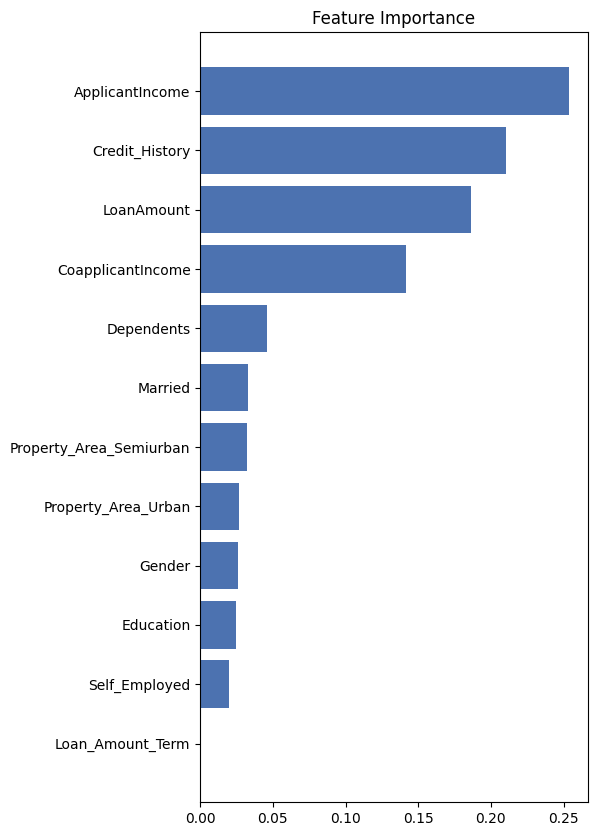

In [106]:
fig, ax = plt.subplots(figsize = (5,10))
ax.barh(y = np.arange(len(features_name)), width = features_importance_sorted)
ax.set_yticks(np.arange(len(features_name)))
ax.set_yticklabels(features_name_sorted)
ax.set_title('Feature Importance')
plt.show()

**Note :** From the visualization of feature importance above, we can see that Applicant Income, Credit History, Loan Amount, and Coapplicants Income have more importance score than the rest. This meeans that these four features are better to describe Loan Status than other features. Moreover, we can see that Loan Amount Term has 0 importance score which means this features is not good enough to describe Loan Status. From those information, we can do feauture engineering (Combining 2 features or more to create new feature or delete some features that may not be useful)  to tweak our model for better performance. Next, we want to apply this feature engineering method on our model.

In [107]:
# Lets take out Loan Term and combine Applicant and Coapplicant Income for each sampling techniques.
display(X.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban


In [108]:
X.drop(columns = 'Loan_Amount_Term', inplace = True)
X['Income Combined'] = X['ApplicantIncome'] + X['CoapplicantIncome']
X.drop(columns = ['ApplicantIncome','CoapplicantIncome'], inplace = True)
display(X.head())

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Income Combined
0,Male,No,0,Graduate,No,128.0,1,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,1,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,1,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,1,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,1,Urban,6000.0


In [109]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 613
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           398 non-null    object 
 1   Married          398 non-null    object 
 2   Dependents       398 non-null    object 
 3   Education        398 non-null    object 
 4   Self_Employed    398 non-null    object 
 5   LoanAmount       398 non-null    float64
 6   Credit_History   398 non-null    object 
 7   Property_Area    398 non-null    object 
 8   Income Combined  398 non-null    float64
dtypes: float64(2), object(7)
memory usage: 31.1+ KB
None


In [110]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.1, random_state = 32)
print("Training data dimension\t:")
print(f"X = {train_x.shape}")
print(f"Y = {train_y.shape}")
print("Testing data dimension\t:")
print(f"X = {test_x.shape}")
print(f"Y = {test_y.shape}")

Training data dimension	:
X = (358, 9)
Y = (358, 1)
Testing data dimension	:
X = (40, 9)
Y = (40, 1)


In [111]:
# Oversampling the minority class and undersampling the majority class.
res_over_under_1 = SMOTENC(sampling_strategy = 0.9, categorical_features = [0,1,2,3,4,6,7], random_state = 32, k_neighbors = 5)
x_res_over_under_1, y_res_over_under_1= res_over_under_1.fit_resample(train_x,train_y)

res_over_under_2 = RandomUnderSampler(sampling_strategy = 0.9, random_state = 32)
x_res_over_under_2, y_res_over_under_2= res_over_under_2.fit_resample(x_res_over_under_1,y_res_over_under_1)

In [112]:
# Class Proportion For Oversampling and Undersampling.
print("Class proportion for oversampling & undersampling :")
print(f"No\t= {y_res_over_under_2.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_over_under_2.value_counts().loc[1].values}") 
print("="*20)

Class proportion for oversampling & undersampling :
No	= [232]
Yes	= [257]


In [113]:
sc_over_under = StandardScaler()
# For oversampling and undersampling.
x_res_over_under_2.loc[:,['LoanAmount','Income Combined']]= sc_over_under.fit_transform(x_res_over_under_2.loc[:,['LoanAmount','Income Combined']])
test_x.loc[:, ['LoanAmount', 'Income Combined']] = sc_over_under.transform(test_x.loc[:, ['LoanAmount', 'Income Combined']])

In [114]:
display(x_res_over_under_2.head())

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Income Combined
0,Male,Yes,0,Not Graduate,No,1.740641,0,Urban,-0.035709
1,Male,Yes,0,Not Graduate,No,-1.581551,1,Rural,-0.963657
2,Male,Yes,0,Not Graduate,Yes,0.498430,1,Urban,-0.071881
3,Male,Yes,3+,Graduate,No,-0.772669,1,Urban,0.286359
4,Male,Yes,0,Graduate,No,-1.899326,1,Rural,0.053329


In [115]:
# oversampling and undersampling.
x_res_over_under_2['Gender'] = x_res_over_under_2['Gender'].replace({'Male' : 1, 'Female' : 0})
x_res_over_under_2['Married'] = x_res_over_under_2['Married'].replace({'Yes' : 1, 'No' : 0})
x_res_over_under_2['Dependents'] = x_res_over_under_2['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
x_res_over_under_2['Education'] = x_res_over_under_2['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
x_res_over_under_2['Self_Employed'] = x_res_over_under_2['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
x_res_over_under_2['Credit_History'] = x_res_over_under_2['Credit_History'].astype(int)
test_x['Gender'] = test_x['Gender'].replace({'Male' : 1, 'Female' : 0})
test_x['Married'] = test_x['Married'].replace({'Yes' : 1, 'No' : 0})
test_x['Dependents'] = test_x['Dependents'].replace({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})
test_x['Education'] = test_x['Education'].replace({'Graduate' : 1, 'Not Graduate' : 0})
test_x['Self_Employed'] = test_x['Self_Employed'].replace({'Yes' : 1, 'No' : 0})
test_x['Credit_History'] = test_x['Credit_History'].astype(int)

In [116]:
# One-Hot Encoding  for the categorical features
x_res_over_under_2 = pd.get_dummies(x_res_over_under_2, drop_first = True)
test_x = pd.get_dummies(test_x, drop_first = True)

In [117]:
display(x_res_over_under_2.head())

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Income Combined,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,0,1.740641,0,-0.035709,0,1
1,1,1,0,0,0,-1.581551,1,-0.963657,0,0
2,1,1,0,0,1,0.498430,1,-0.071881,0,1
3,1,1,3,1,0,-0.772669,1,0.286359,0,1
4,1,1,0,1,0,-1.899326,1,0.053329,0,0


In [118]:
display(test_x.head())

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Income Combined,Property_Area_Semiurban,Property_Area_Urban
574,1,1,3,1,0,0.845094,1,1.090488,1,0
498,1,1,1,1,1,-0.743780,1,-1.351809,1,0
221,1,1,2,1,0,-0.137119,1,0.617471,1,0
296,1,1,1,1,0,2.289525,1,1.416730,1,0
403,0,0,0,0,0,-1.957103,1,-2.000120,1,0


In [119]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state = 32)
logreg = LogisticRegression()
svc = SVC()

## Classifier : Decision Tree

In [120]:
y_train_pred_dt = dt.fit(x_res_over_under_2,y_res_over_under_2).predict(x_res_over_under_2)
y_test_pred_dt  = dt.predict(test_x)
clf_report_train_dt= classification_report(y_res_over_under_2, y_train_pred_dt)
clf_report_test_dt = classification_report(test_y, y_test_pred_dt)
roc_score_train_dt = roc_auc_score(y_res_over_under_2,y_train_pred_dt)
roc_score_test_dt = roc_auc_score(test_y, y_test_pred_dt)
cv_result_dt = np.mean(cross_val_score(dt, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_dt = np.round(precision_score(test_y, y_test_pred_dt), 2)
recall_dt = np.round(recall_score(test_y, y_test_pred_dt), 2)
accuracy_dt = np.round(accuracy_score(test_y, y_test_pred_dt), 2)

In [121]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report Training :")
print(clf_report_train_dt)
print("="*25)
print("ROC AUC Score for Training Data:")
print(roc_score_train_dt)
print("="*25)
print("Cross validation result :")
print(cv_result_dt)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_test_dt)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_test_dt)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report Training :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       257

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489

ROC AUC Score for Training Data:
1.0
Cross validation result :
0.7505575426046708
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.90      0.67      0.77        27

    accuracy                           0.73        40
   macro avg       0.73      0.76      0.72        40
weighted avg       0.79      0.72      0.73        40

ROC AUC Score for Testing Data :
0.7564102564102564


In [122]:
print(precision_dt)
print(recall_dt)

0.9
0.67


## Classifier : Random Forest

In [123]:
y_train_pred_rf = rf.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_test_pred_rf  = rf.predict(test_x)
clf_report_train_rf= classification_report(y_res_over_under_2, y_train_pred_rf)
clf_report_test_rf = classification_report(test_y, y_test_pred_rf)
roc_score_train_rf = roc_auc_score(y_res_over_under_2,y_train_pred_rf)
roc_score_test_rf = roc_auc_score(test_y, y_test_pred_rf)
cv_result_rf = np.mean(cross_val_score(rf, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_rf = np.round(precision_score(test_y, y_test_pred_rf), 2)
recall_rf = np.round(recall_score(test_y, y_test_pred_rf), 2)
accuracy_rf = np.round(accuracy_score(test_y, y_test_pred_rf), 2)

In [124]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report Training :")
print(clf_report_train_rf)
print("="*25)
print("ROC AUC Score for Training Data:")
print(roc_score_train_rf)
print("="*25)
print("Cross validation result :")
print(cv_result_rf)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_test_rf)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_test_rf)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report Training :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       257

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489

ROC AUC Score for Training Data:
1.0
Cross validation result :
0.8139280454449821
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.92      0.89      0.91        27

    accuracy                           0.88        40
   macro avg       0.85      0.87      0.86        40
weighted avg       0.88      0.88      0.88        40

ROC AUC Score for Testing Data :
0.8675213675213674


## Classifier : Logistic Regression

In [125]:
y_train_pred_logreg = logreg.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_test_pred_logreg  = logreg.predict(test_x)
clf_report_train_logreg = classification_report(y_res_over_under_2, y_train_pred_logreg)
clf_report_test_logreg = classification_report(test_y, y_test_pred_logreg)
roc_score_train_logreg = roc_auc_score(y_res_over_under_2,y_train_pred_logreg)
roc_score_test_logreg = roc_auc_score(test_y, y_test_pred_logreg)
cv_result_logreg = np.mean(cross_val_score(logreg, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_logreg = np.round(precision_score(test_y, y_test_pred_logreg), 2)
recall_logreg = np.round(recall_score(test_y, y_test_pred_logreg), 2)
accuracy_logreg = np.round(accuracy_score(test_y, y_test_pred_logreg), 2)

In [126]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report Training :")
print(clf_report_train_logreg)
print("="*25)
print("ROC AUC Score for Training Data:")
print(roc_score_train_logreg)
print("="*25)
print("Cross validation result :")
print(cv_result_logreg)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_test_logreg)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_test_logreg)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report Training :
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       232
           1       0.71      0.91      0.80       257

    accuracy                           0.76       489
   macro avg       0.78      0.75      0.75       489
weighted avg       0.78      0.76      0.75       489

ROC AUC Score for Training Data:
0.7483563665637998
Cross validation result :
0.7321481169787504
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.86      0.93      0.89        27

    accuracy                           0.85        40
   macro avg       0.84      0.81      0.82        40
weighted avg       0.85      0.85      0.85        40

ROC AUC Score for Testing Data :
0.8091168091168092


## Classifier : SVC

In [127]:
y_train_pred_svc = svc.fit(x_res_over_under_2,np.ravel(y_res_over_under_2)).predict(x_res_over_under_2)
y_test_pred_svc  = svc.predict(test_x)
clf_report_train_svc = classification_report(y_res_over_under_2, y_train_pred_svc)
clf_report_test_svc = classification_report(test_y, y_test_pred_svc)
roc_score_train_svc = roc_auc_score(y_res_over_under_2,y_train_pred_svc)
roc_score_test_svc = roc_auc_score(test_y, y_test_pred_svc)
cv_result_svc = np.mean(cross_val_score(svc, X = x_res_over_under_2, y = y_res_over_under_2, cv = 5, n_jobs = -1, scoring = 'accuracy'))
precision_svc = np.round(precision_score(test_y, y_test_pred_svc), 2)
recall_svc = np.round(recall_score(test_y, y_test_pred_svc), 2)
accuracy_svc = np.round(accuracy_score(test_y, y_test_pred_svc), 2)

In [128]:
print("Model Evaluation :")
print("~"*25)
print("Classification Report Training :")
print(clf_report_train_svc)
print("="*25)
print("ROC AUC Score for Training Data:")
print(roc_score_train_svc)
print("="*25)
print("Cross validation result :")
print(cv_result_svc)
print("="*25)
print("Classification Report for Testing Data :")
print(clf_report_test_svc)
print("="*25)
print("ROC AUC Score for Testing Data :")
print(roc_score_test_svc)

Model Evaluation :
~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report Training :
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       232
           1       0.74      0.96      0.83       257

    accuracy                           0.80       489
   macro avg       0.83      0.79      0.79       489
weighted avg       0.83      0.80      0.79       489

ROC AUC Score for Training Data:
0.7887344022541259
Cross validation result :
0.7668630338733431
Classification Report for Testing Data :
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.90      1.00      0.95        27

    accuracy                           0.93        40
   macro avg       0.95      0.88      0.91        40
weighted avg       0.93      0.93      0.92        40

ROC AUC Score for Testing Data :
0.8846153846153846


In [129]:
report_evaluation = {'Model'           : ['Decision Tree','Random Forest','Logistic Regression','SVC'],
                     'Precision Score' : [precision_dt, precision_rf, precision_logreg, precision_svc],
                     'Recall Score'    : [recall_dt, recall_rf, recall_logreg, recall_svc],
                     'Accuracy Score'  : [accuracy_dt, accuracy_rf, accuracy_logreg, accuracy_svc]}
df_report = pd.DataFrame(report_evaluation)
display(df_report)

,Model,Precision Score,Recall Score,Accuracy Score
0,Decision Tree,0.90,0.67,0.72
1,Random Forest,0.92,0.89,0.88
2,Logistic Regression,0.86,0.93,0.85
3,SVC,0.90,1.00,0.92


**Note :** From the report above, we can see that feature engineering & feature selection made the performance of the model is better than the previous one. we'll proceed to improve our model's performance by tweaking its parameters. Tweakin parameters of the model is commonly called Hyperparameter Tuning. We'll try to tuning every models that we have in the next section.

# Hyperparameter Tuning

In [130]:
# Hyperparameter tuning.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Classifier : Decision Tree

In [131]:
parameter_dt = {'criterion' : ['gini','entropy'],
                'splitter'  : ['best','random'],
                'min_samples_split' : [2,4,6,8],
                'max_features' : [None, 'auto','sqrt','log2']}
dt = DecisionTreeClassifier(random_state = 32)
dt_best = GridSearchCV(estimator = dt, param_grid = parameter_dt, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
best_params = dt_best.best_params_
best_scores = dt_best.best_score_
y_pred_best = dt_best.predict(test_x)
precision_best_dt = precision_score(test_y, y_pred_best)
recall_best_dt = recall_score(test_y, y_pred_best)
accuracy_best_dt = accuracy_score(test_y, y_pred_best)

C:\Users\naufa\anaconda3\envs\Project_DM\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [132]:
print("Best Parameters :")
for key, value in best_params.items():
    print(f"{key} : {value}")
print("="*25)
print("Model Evaluation :")
print(f"Precision\t= {precision_best_dt:.2}")
print(f"Recall\t\t= {recall_best_dt:.2}")
print(f"Accuracy\t= {accuracy_best_dt:.2}")

Best Parameters :
criterion : entropy
max_features : auto
min_samples_split : 4
splitter : best
Model Evaluation :
Precision	= 0.88
Recall		= 0.81
Accuracy	= 0.8


## Classifier : Random Forest

In [133]:
parameter_rf = {'n_estimators' : [100,200,300,400,500,600],
                'criterion' : ['gini','entropy'],
                'min_samples_split' : [2,4,6,8],
                'max_features' : [None,'sqrt','log2']}
rf = RandomForestClassifier(random_state = 32)
rf_best = GridSearchCV(estimator = rf, param_grid = parameter_rf, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
best_params_rf = rf_best.best_params_
best_scores_rf = rf_best.best_score_
y_pred_best_rf = rf_best.predict(test_x)
precision_best_rf = precision_score(test_y, y_pred_best_rf)
recall_best_rf = recall_score(test_y, y_pred_best_rf)
accuracy_best_rf = accuracy_score(test_y, y_pred_best_rf)

In [134]:
print("Best Parameters :")
for key, value in best_params_rf.items():
    print(f"{key} : {value}")
print("="*25)
print("Model Evaluation :")
print(f"Precision\t= {precision_best_rf:.2}")
print(f"Recall\t\t= {recall_best_rf:.2}")
print(f"Accuracy\t= {accuracy_best_rf:.2}")

Best Parameters :
criterion : entropy
max_features : sqrt
min_samples_split : 6
n_estimators : 200
Model Evaluation :
Precision	= 0.86
Recall		= 0.89
Accuracy	= 0.82


## Classifier : Logistic Regression

In [135]:
parameter_logreg = {'solver' : ['lbfgs', 'liblinear'],
                'C' : np.arange(0.5,3.1, 0.25)}
logreg = LogisticRegression(random_state = 32, n_jobs = 5)
logreg_best = GridSearchCV(estimator = logreg, param_grid = parameter_logreg, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
best_params_logreg = logreg_best.best_params_
best_scores_logreg = logreg_best.best_score_
y_pred_best_logreg = logreg_best.predict(test_x)
precision_best_logreg = precision_score(test_y, y_pred_best_logreg)
recall_best_logreg = recall_score(test_y, y_pred_best_logreg)
accuracy_best_logreg = accuracy_score(test_y, y_pred_best_logreg)

print("Best Parameters :")
for key, value in best_params_logreg.items():
    print(f"{key} : {value}")
print("="*25)
print("Model Evaluation :")
print(f"Precision\t= {precision_best_logreg:.2}")
print(f"Recall\t\t= {recall_best_logreg:.2}")
print(f"Accuracy\t= {accuracy_best_logreg:.2}")

In [136]:
parameter_svc = {'kernel' : ['linear','rbf','poly','sigmoid'],
                'C' : np.arange(0.5,3.1, 0.25),
                'gamma' : ['scale','auto']}
svc = SVC(random_state = 32)
svc_best = GridSearchCV(estimator = svc, param_grid = parameter_svc, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,np.ravel(y_res_over_under_2))
best_params_svc = svc_best.best_params_
best_scores_svc = svc_best.best_score_
y_pred_best_svc = svc_best.predict(test_x)
precision_best_svc = precision_score(test_y, y_pred_best_svc)
recall_best_svc = recall_score(test_y, y_pred_best_svc)
accuracy_best_svc = accuracy_score(test_y, y_pred_best_svc)

In [137]:
print("Best Parameters :")
for key, value in best_params_svc.items():
    print(f"{key} : {value}")
print("="*25)
print("Model Evaluation :")
print(f"Precision\t= {precision_best_svc:.2}")
print(f"Recall\t\t= {recall_best_svc:.2}")
print(f"Accuracy\t= {accuracy_best_svc:.2}")

Best Parameters :
C : 3.0
gamma : scale
kernel : rbf
Model Evaluation :
Precision	= 0.9
Recall		= 0.96
Accuracy	= 0.9


# Create a Pipeline
Now lets create a pipeline for several steps from preprocessing until hyperparameter tuning. There will be 6 pipelines for every models.

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score
import xgboost as xgb

In [139]:
X = data_without.copy().drop(['Loan_Status','Loan_ID'],axis = 1)
Y = data_without.copy()[['Loan_Status']]
print("Data Info\t:")
print(X.info())

Data Info	:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             398 non-null    object 
 1   Married            398 non-null    object 
 2   Dependents         398 non-null    object 
 3   Education          398 non-null    object 
 4   Self_Employed      398 non-null    object 
 5   ApplicantIncome    398 non-null    int64  
 6   CoapplicantIncome  398 non-null    float64
 7   LoanAmount         398 non-null    float64
 8   Loan_Amount_Term   398 non-null    float64
 9   Credit_History     398 non-null    int32  
 10  Property_Area      398 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 35.8+ KB
None


In [140]:
X.drop(columns = 'Loan_Amount_Term', inplace = True)
X['Income Combined'] = X['ApplicantIncome'] + X['CoapplicantIncome']
X.drop(columns = ['ApplicantIncome','CoapplicantIncome'], inplace = True)
display(X.head())

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Income Combined
0,Male,No,0,Graduate,No,128.0,1,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,1,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,1,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,1,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,1,Urban,6000.0


In [141]:
X['Credit_History'] = X['Credit_History'].astype(str)
Y['Loan_Status'] = Y['Loan_Status'].replace({"Y" : 1, "N" : 0})

In [142]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.1, random_state = 32)
print("Training data dimension\t:")
print(f"X = {train_x.shape}")
print(f"Y = {train_y.shape}")
print("Testing data dimension\t:")
print(f"X = {test_x.shape}")
print(f"Y = {test_y.shape}")

Training data dimension	:
X = (358, 9)
Y = (358, 1)
Testing data dimension	:
X = (40, 9)
Y = (40, 1)


In [143]:
# Oversampling the minority class and undersampling the majority class.
res_over_under_1 = SMOTENC(sampling_strategy = 0.9, categorical_features = [0,1,2,3,4,6,7], random_state = 32, k_neighbors = 5)
x_res_over_under_1, y_res_over_under_1= res_over_under_1.fit_resample(train_x,train_y)

res_over_under_2 = RandomUnderSampler(sampling_strategy = 0.9, random_state = 32)
x_res_over_under_2, y_res_over_under_2= res_over_under_2.fit_resample(x_res_over_under_1,y_res_over_under_1)

In [144]:
# Class Proportion For Oversampling and Undersampling.
print("Class proportion for oversampling & undersampling :")
print(f"No\t= {y_res_over_under_2.value_counts().loc[0].values}")
print(f"Yes\t= {y_res_over_under_2.value_counts().loc[1].values}") 
print("="*20)

Class proportion for oversampling & undersampling :
No	= [232]
Yes	= [257]


In [145]:
pipe_standarscaler = Pipeline([('SC' , StandardScaler())])
pipe_onehot = Pipeline([('OHE', OneHotEncoder(drop = 'first'))])
ct_prep = ColumnTransformer(transformers = 
            [('Numeric process',pipe_standarscaler, ['LoanAmount','Income Combined']),
             ('Category process', pipe_onehot, ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'])]
            )

In [146]:
dict_model = {"Model" : [],
              "Precision" : [],
              "Recall" : [],
              "F1 Score" : [],
              "Accuracy" : []}

## Classifier : Decision Tree

In [147]:
parameter_dt = {'DT__criterion' : ['gini','entropy'],
                'DT__splitter'  : ['best','random'],
                'DT__min_samples_split' : [2,4,6,8],
                'DT__max_features' : [None,'sqrt','log2']}

pipeline_dt = Pipeline([
            ('Preprocessing' , ct_prep),
            ('DT' , DecisionTreeClassifier(random_state = 32))])

dt_best = GridSearchCV(estimator = pipeline_dt, param_grid = parameter_dt, cv = 5, scoring = ['accuracy','f1'], refit = 'accuracy', n_jobs = 5).fit(x_res_over_under_2,y_res_over_under_2)

In [148]:
dt_cv_score = dt_best.best_score_
dt_best_params = dt_best.best_params_
dt_y_pred = dt_best.predict(test_x)
dt_precision = precision_score(test_y,dt_y_pred)
dt_recall = recall_score(test_y,dt_y_pred)
dt_f1 = f1_score(test_y, dt_y_pred)
dt_accuracy = accuracy_score(test_y, dt_y_pred)

In [149]:
print("Best parameters :")
print(f"{dt_best_params}")
print("Model evaluation :")
print(f"CV score = {dt_cv_score:.2}")
print(f"Precision = {dt_precision:.2%}")
print(f"Recall = {dt_recall:.2%}")
print(f"F1 score = {dt_f1:.2%}")
print(f"Accuracy = {dt_accuracy:.2%}")

Best parameters :
{'DT__criterion': 'entropy', 'DT__max_features': 'sqrt', 'DT__min_samples_split': 2, 'DT__splitter': 'best'}
Model evaluation :
CV score = 0.78
Precision = 88.89%
Recall = 88.89%
F1 score = 88.89%
Accuracy = 85.00%


In [150]:
dict_model['Model'] = ["Decision Tree"]
dict_model['Precision'] = [f"{dt_precision:.2%}"]
dict_model['Recall'] = [f"{dt_recall:.2%}"]
dict_model['F1 Score'] = [f"{dt_f1:.2%}"]
dict_model['Accuracy'] = [f"{dt_accuracy:.2%}"]